In [0]:
# install imbalanced learning package
!pip install -U imbalanced-learn -q

     |████████████████████████████████| 163kB 2.8MB/s 


In [0]:
from google.colab import files
uploaded=files.upload()

Saving credit_risk_data.csv to credit_risk_data.csv


In [0]:
#credit_risk_clean_data.csv
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
Scaler =MinMaxScaler() 

credit_risk=pd.read_csv('credit_risk_data.csv')
credit_risk.head()



,index,Delinquency,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [0]:
credit_risk.shape

(150000, 12)

In [0]:
credit_risk=credit_risk.drop(['index'], axis =1)
credit_risk.head()
credit_risk_clean_data=credit_risk.dropna()
credit_risk_clean_data.head()


,Delinquency,Revolving Credit Percentage,Capital Reserves,Num Late 60,Debt Ratio,Monthly Income,Num Credit Lines,Num Late Past 90,Num Real Estate,Num Late 90,Num Employees
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


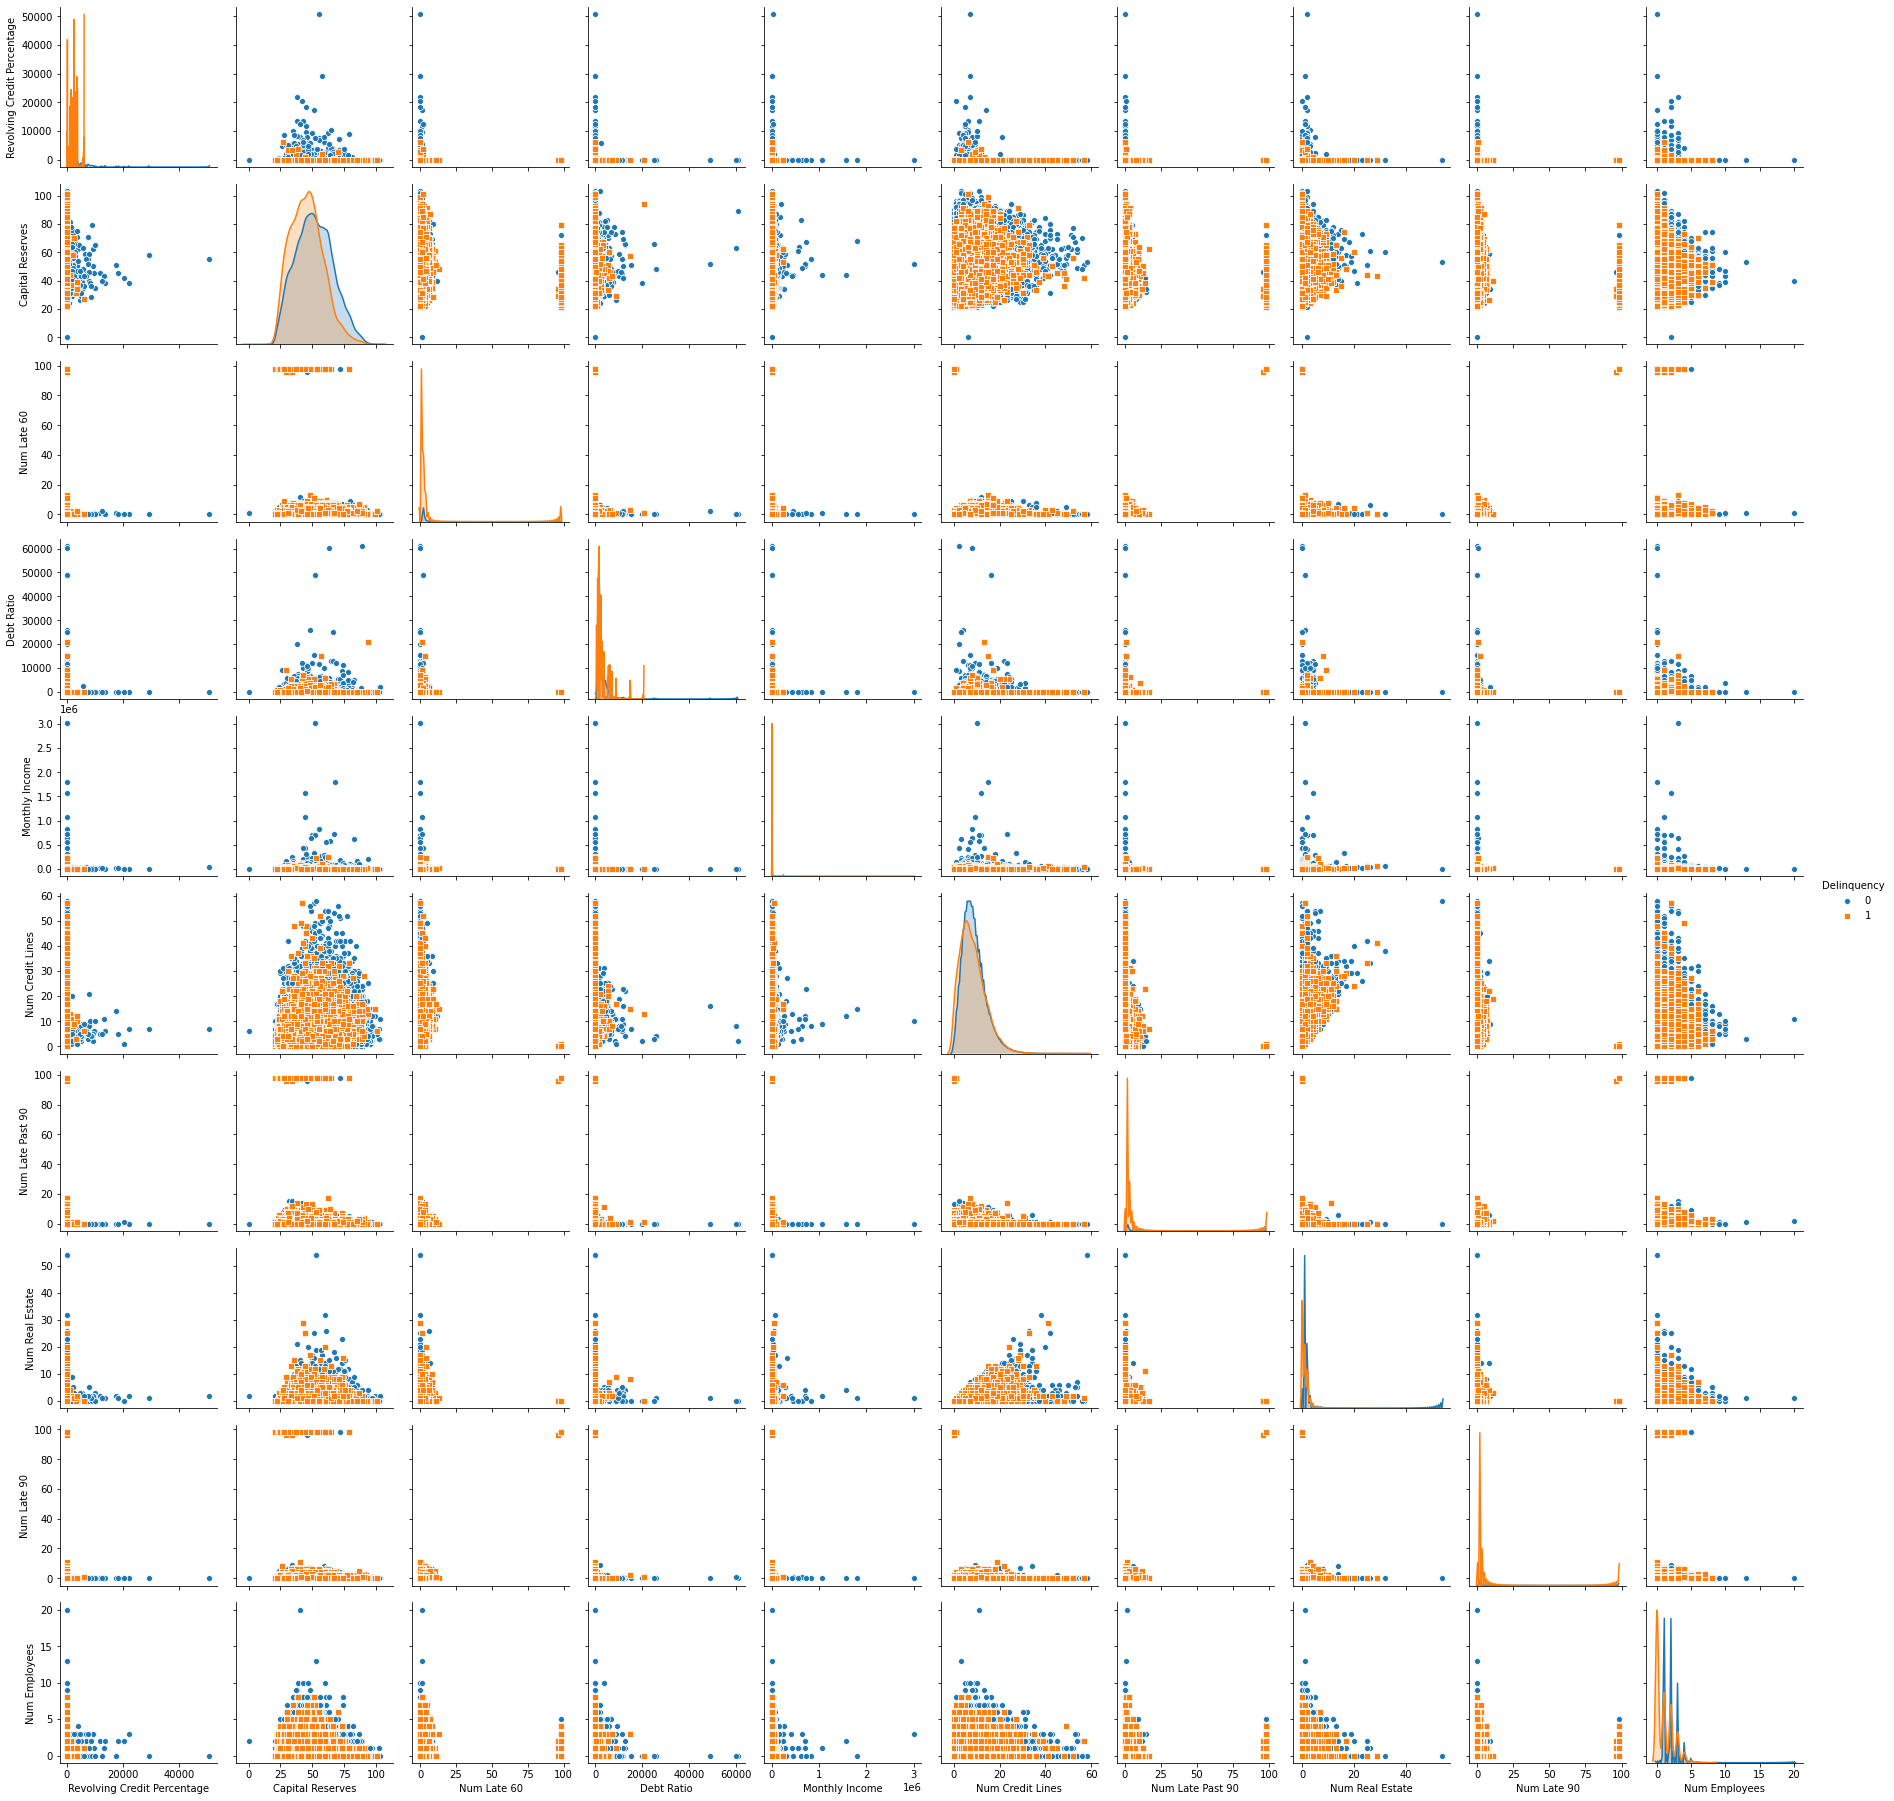

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
h=sns.pairplot(credit_risk_clean_data,hue='Delinquency',markers=["o","s"])

In [0]:
import json
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(
    font_scale=1.5,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
)



In [0]:
!pip install seaborn

In [0]:
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
Scaler =MinMaxScaler() 
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
#df = pd.read_csv('/Users/ellelari/Desktop/credit_risk_data_balanced.csv')
credit_risk_clean_data.columns=['Delinquency','RCP','CR','NL60','DR','MI','NCL','NLP90','NRE','NL90','NE']
features = [['Delinquency','RCP','CR','NL60','DR','MI','NCL','NLP90','NRE','NL90','NE']]
for feature in features:
    credit_risk_clean_data[feature] = Scaler.fit_transform(credit_risk_clean_data[feature])

X = credit_risk_clean_data.drop(['Delinquency'], axis =1 )
Y =credit_risk_clean_data['Delinquency']
x_scaled = scaler.fit_transform(X)
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = credit_risk_clean_data.drop(columns=['Delinquency'])
y = credit_risk_clean_data['Delinquency']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)


<BarContainer object of 120269 artists>

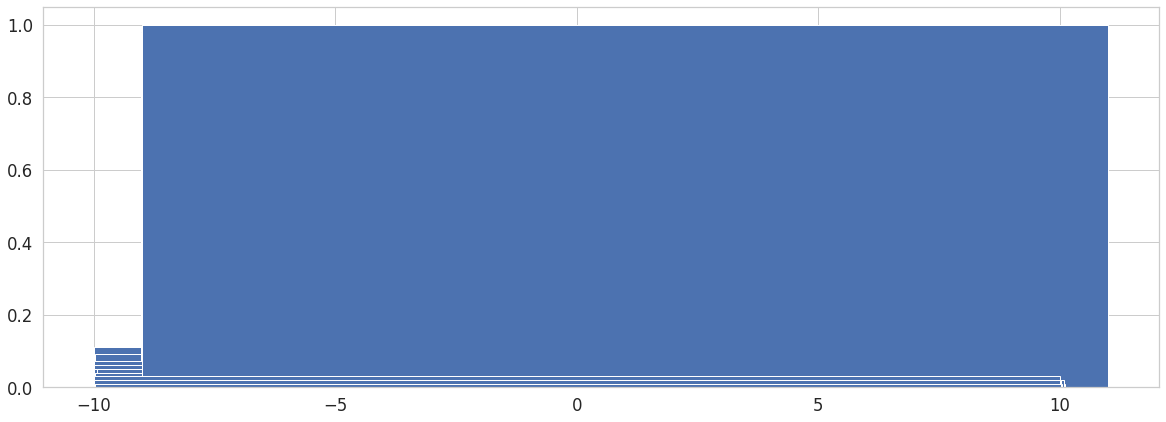

In [0]:
plt.bar(credit_risk_clean_data['NL60'], credit_risk_clean_data['NL90'], width=20)

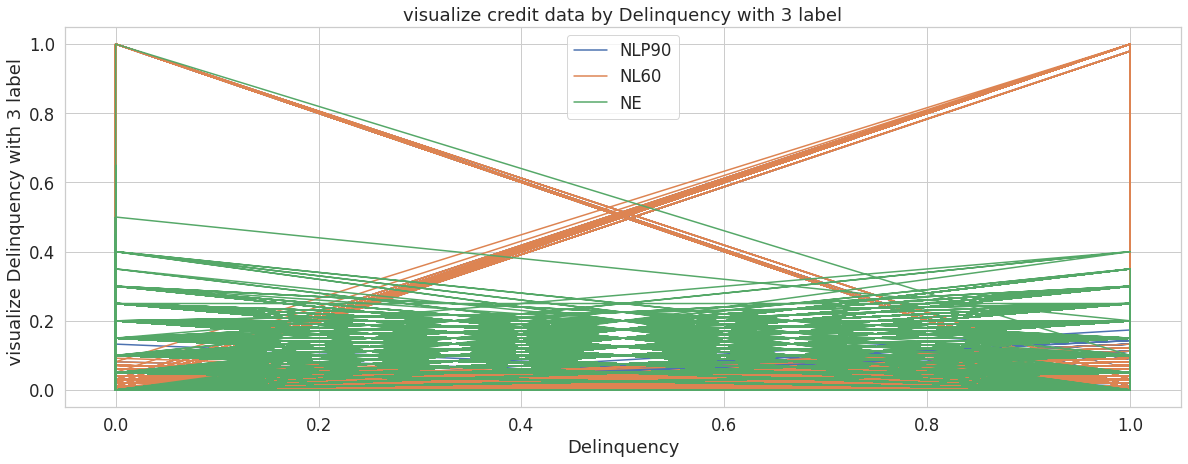

In [0]:
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NLP90'], label='NLP90')
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NL60'], label='NL60')
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NE'], label='NE')

plt.xlabel('Delinquency')
plt.ylabel('  visualize Delinquency with 3 label')
plt.title('visualize credit data by Delinquency with 3 label')
plt.grid(True)
plt.legend()



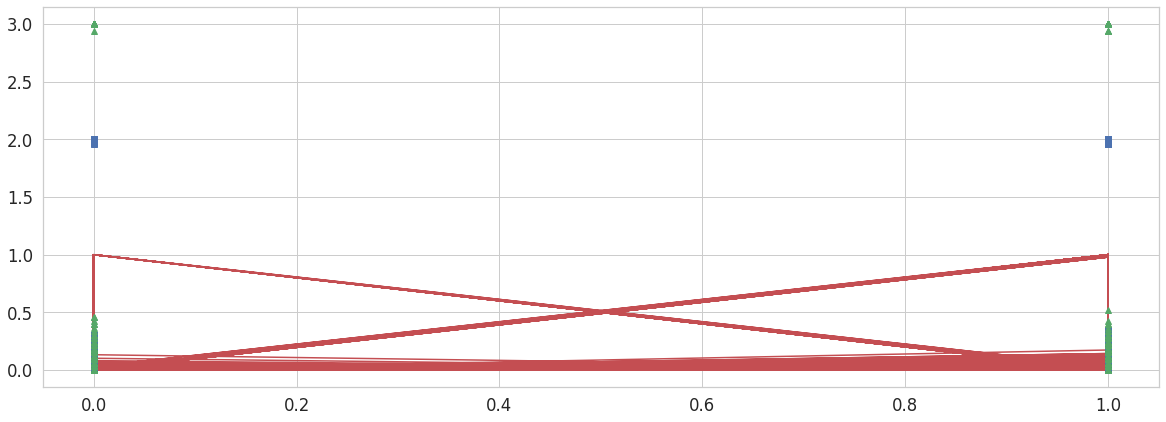

In [0]:
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NLP90'], 'r-')
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NLP90']*2, 'bs')
plt.plot(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NLP90']*3, 'g^')

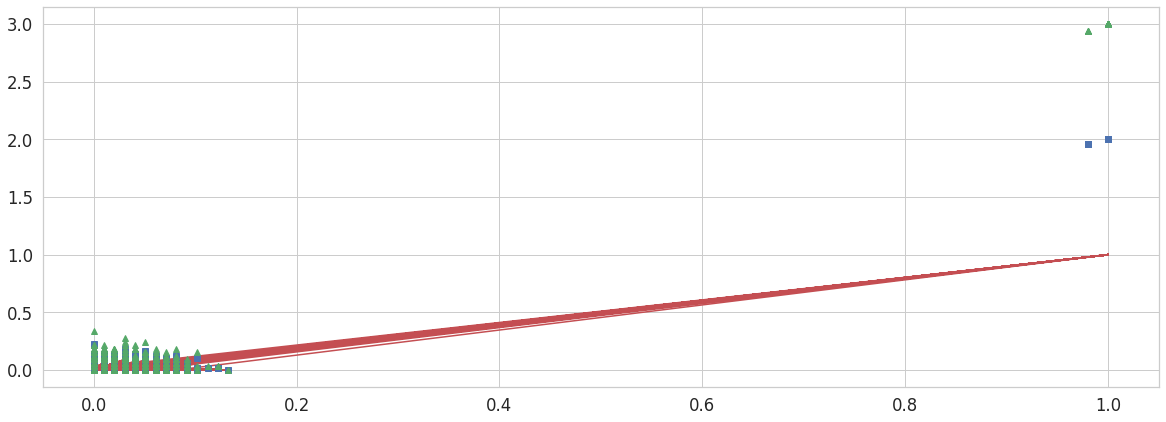

In [0]:
plt.plot(credit_risk_clean_data['NL60'], credit_risk_clean_data['NL90'], 'r-')
plt.plot(credit_risk_clean_data['NL60'], credit_risk_clean_data['NL90']*2, 'bs')
plt.plot(credit_risk_clean_data['NL60'], credit_risk_clean_data['NL90']*3, 'g^')

<BarContainer object of 120269 artists>

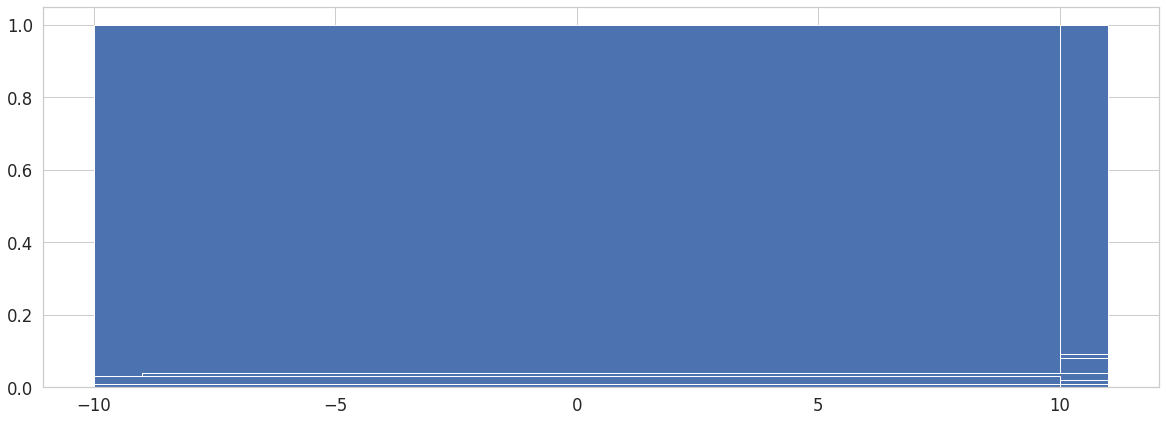

In [0]:
plt.bar(credit_risk_clean_data['Delinquency'], credit_risk_clean_data['NLP90'], width=20)

(array([111912.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
          8357.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

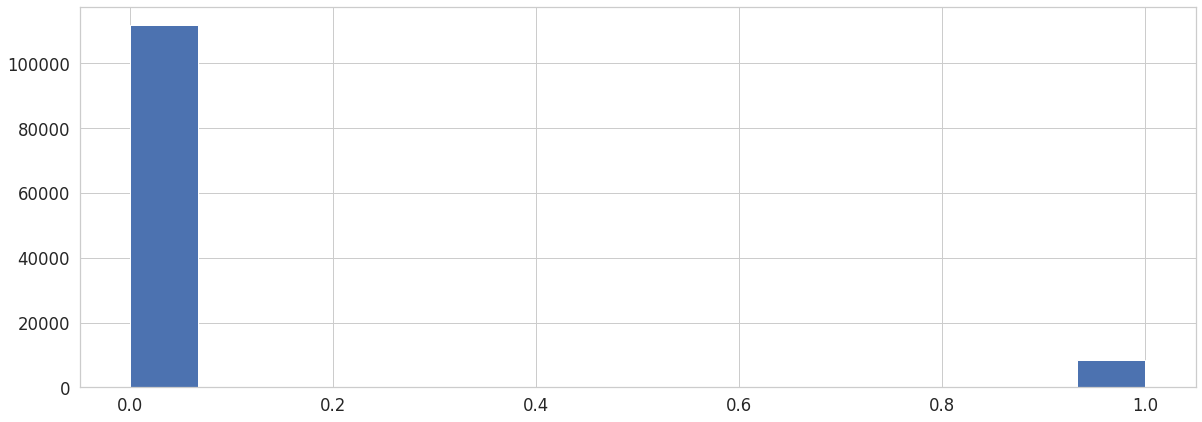

In [0]:
plt.hist(credit_risk_clean_data['Delinquency'], bins=15)

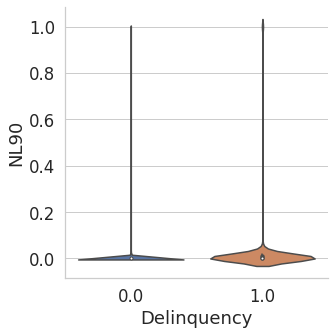

In [0]:
sns.catplot(x='Delinquency', y='NL90', kind='violin', data=credit_risk_clean_data)

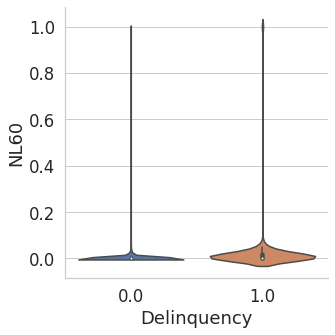

In [0]:
sns.catplot(x='Delinquency', y='NL60', kind='violin', data=credit_risk_clean_data)

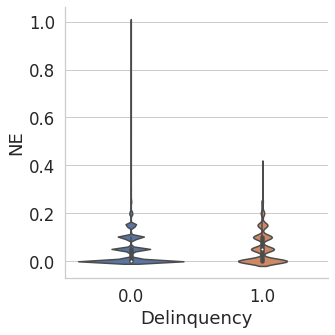

In [0]:
sns.catplot(x='Delinquency', y='NE', kind='violin', data=credit_risk_clean_data)

In [0]:
from sklearn.neighbors import KNeighborsClassifier as KNN
import sklearn.metrics as metrics
k_range = range(1,26)
scores = {}
scores_list =[]
for k in k_range:
    knn = KNN(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

{1: 0.8992267398353704, 2: 0.9268728693772346, 3: 0.9239211773509604, 4: 0.9291178182422882, 5: 0.9291593913694188, 6: 0.9294088301322025, 7: 0.929367257005072, 8: 0.9295751226407251, 9: 0.9297829882763782, 10: 0.9298245614035088, 11: 0.9299492807849007, 12: 0.9297829882763782, 13: 0.9296582688949863, 14: 0.9295335495135945, 15: 0.9296166957678557, 16: 0.9296998420221169, 17: 0.9297414151492476, 18: 0.9296166957678557, 19: 0.9300324270391619, 20: 0.92990770765777, 21: 0.9299492807849007, 22: 0.9298661345306394, 23: 0.9300740001662925, 24: 0.9298245614035088, 25: 0.9298661345306394}


In [0]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.8992267398353704, 0.9268728693772346, 0.9239211773509604, 0.9291178182422882, 0.9291593913694188, 0.9294088301322025, 0.929367257005072, 0.9295751226407251, 0.9297829882763782, 0.9298245614035088, 0.9299492807849007, 0.9297829882763782, 0.9296582688949863, 0.9295335495135945, 0.9296166957678557, 0.9296998420221169, 0.9297414151492476, 0.9296166957678557, 0.9300324270391619, 0.92990770765777, 0.9299492807849007, 0.9298661345306394, 0.9300740001662925, 0.9298245614035088, 0.9298661345306394]


In [0]:
y_pred = knn.predict(x_test) 
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96     22341
         1.0       0.59      0.05      0.09      1713

    accuracy                           0.93     24054
   macro avg       0.76      0.52      0.53     24054
weighted avg       0.91      0.93      0.90     24054



Text(0, 0.5, 'Testing Accuracy')

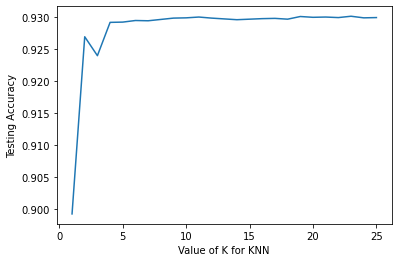

In [0]:
# import Matplotlib (scientific plotting library)
import matplotlib.pyplot as plt

# allow plots to appear within the notebook
%matplotlib inline

# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [0]:
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9298661345306394


In [0]:
from sklearn.neighbors import KNeighborsClassifier
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,10)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    #Fit the model 
    knn.fit(x_train, y_train) 
    #Compute accuracy on the training set 
    train_accuracy[i] = knn.score(x_train, y_train) 
    #Compute accuracy on the test set 
    test_accuracy[i] = knn.score(x_test, y_test) 

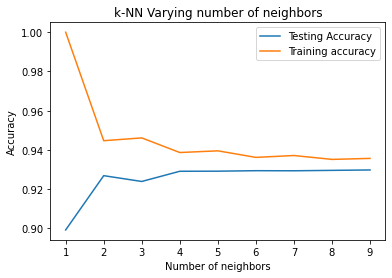

In [0]:
#Generate plot
 plt.title('k-NN Varying number of neighbors')
 plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
 plt.plot(neighbors, train_accuracy, label='Training accuracy')
 plt.legend()
 plt.xlabel('Number of neighbors')
 plt.ylabel('Accuracy')
 plt.show()

In [0]:
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
#Setup a knn classifier with k neighbors
knn = KNN(n_neighbors=10)
 
#Fit the model
knn.fit(x_train,y_train) 
best_n_neighbours = np.argmax(np.array([metrics.accuracy_score(k, x_train, y_train, x_test, y_test) for k in range(1, 10)]))+1 
print('For best accuracy use k = ', best_n_neighbours)

In [0]:
def nsva_ranking(data_):
    if np.sum(np.sum(data_<0)) >0:
        print("\n Error: Data must be a nonnegative matrix\n")
        quit()
        
        
    u,s,v = np.linalg.svd(data_, full_matrices=False)  
    ranking_score =-u[:,0]
    return ranking_score

In [0]:
def n_sva(X):
    if(X<0).all().all():
        print('Check your input data')

In [0]:
def n_sva(X):

  if(X<0).all().all():
    print('Check your input data')
    quit( )

  u,s,vt = np.linalg.svd(X,full_matrices=False)

  u_0_app = X.dot(vt[0,:].T)/s[0]

  u_idx =np.argsort(u[:,0])
  u_0_app_idx=np.argsort(u_0_app)
  rank_score_0 =-u_0_app[u_0_app_idx]
  rank_score=-u[u_idx,0]
  return u_0_app_idx, u_idx, rank_score_0, rank_score

In [0]:
n, m =credit_risk_clean_data.shape

In [0]:
def computeVCR(x_mat):
  s= np.linalg.svd(x_mat, compute_uv=False)
  rate=s[0] / np.sum(s)
  return rate

vcr= computeVCR(credit_risk_clean_data)
print("VCR of this dataset:"+ str(vcr))

VCR of this dataset:0.8489279649863943


In [0]:
u_0_app_idx,u_idx,rank_score_0,rank_score=n_sva(credit_risk_clean_data)
credit_risk_clean_data.iloc[u_idx[0:10],:]

In [0]:
v_0_app_idx,v_idx,v_rank_score_0,v_rank_score=n_sva(credit_risk_clean_data.T)

ranked_varibles=[]

for e in v_idx:
    ranked_varibles.append(credit_risk_clean_data.columns[e])
ranked_varible_score={}
for i in range(len(ranked_varibles)):
    ranked_varible_score[ranked_varibles[i]]=v_rank_score[i]
print(str(ranked_varible_score).replace(',',',\n'))

{'MI': 0.9999989623576057,
 'CR': 0.0013919331446447143,
 'RCP': 0.0002613706041393818,
 'NCL': 0.0002594437472605996,
 'NRE': 3.6194915720189075e-05,
 'NE': 2.6716721736109333e-05,
 'DR': 8.437479959424662e-06,
 'NL60': 8.083297841053345e-06,
 'NLP90': 3.09619108819915e-06,
 'NL90': 2.790579024266812e-06,
 'Deliquency': 1.5562948773029106e-06}


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  """


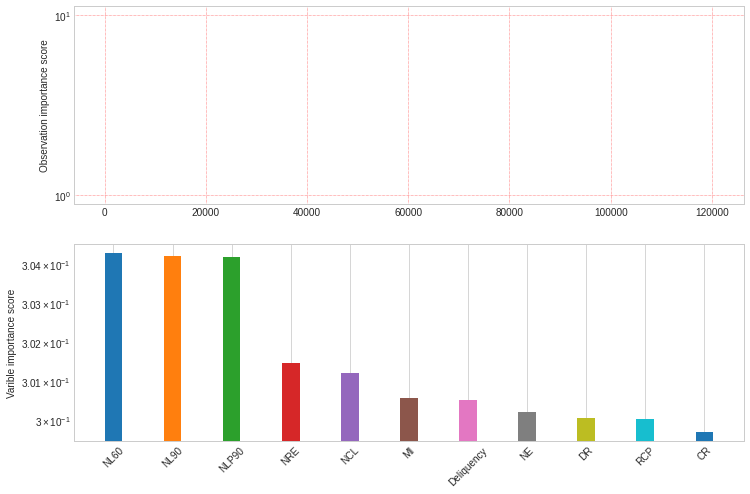

In [0]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)

plt.plot(rank_score,'r-.',marker='p',MarkerEdgeColor='b',MarkerFaceColor='w')
plt.yscale('log')
h=plt.ylabel('Observation importance score')
plt.grid('on',linewidth=0.5,color='r',linestyle=':')

plt.subplot(2,1,2)
plt.style.use('seaborn-whitegrid')
x_tick=np.arange(len(ranked_varibles))

for i in range(len(x_tick)):
    plt.bar(x_tick[i],v_rank_score[i],width=0.3)
    plt.xticks(x_tick,ranked_varibles)
    ax2=plt.gca()
for xtk_label in ax2.get_xticklabels():
    xtk_label.set_rotation(45)
    h=plt.ylabel('Varible importance score')
    plt.yscale('log')

In [0]:
from sklearn.preprocessing import StandardScaler
normalized_data=StandardScaler().fit_transform(credit_risk_clean_data)
normalized_data_df=pd.DataFrame(data=normalized_data,columns =credit_risk_clean_data.columns, index=credit_risk_clean_data.index)

print(normalized_data_df.head())

         Deliquency       RCP        CR  ...       NRE      NL90        NE
person0    3.659427 -0.019973 -0.435985  ...  4.303154 -0.054477  0.999810
person1   -0.273267 -0.019229 -0.782566  ... -0.917557 -0.054477  0.129023
person2   -0.273267 -0.020393 -0.921199  ... -0.917557 -0.054477 -0.741765
person3   -0.273267 -0.022044 -1.475729  ... -0.917557 -0.054477 -0.741765
person4   -0.273267 -0.019424 -0.158720  ... -0.047438 -0.054477 -0.741765

[5 rows x 11 columns]


In [0]:
normalized_data2 =normalized_data -np.min(normalized_data)
normalized_data2_df=pd.DataFrame(data=normalized_data2,columns =credit_risk_clean_data.columns)

In [0]:
v_0_app_idx,v_idx,v_rank_score_0,v_rank_score=n_sva(normalized_data2_df.T)

ranked_varibles=[]

for e in v_idx:
    ranked_varibles.append(normalized_data2_df.columns[e])
ranked_varible_score={}
for i in range(len(ranked_varibles)):
    ranked_varible_score[ranked_varibles[i]]=v_rank_score[i]
print(str(ranked_varible_score).replace(',',',\n'))

{'NL60': 0.30431434700966464,
 'NL90': 0.30421529475125647,
 'NLP90': 0.3041930097034584,
 'NRE': 0.30148183596325645,
 'NCL': 0.30121517182159874,
 'MI': 0.3005840171293879,
 'Deliquency': 0.3005390528220434,
 'NE': 0.3002111190289971,
 'DR': 0.30006051077915236,
 'RCP': 0.30005020917446185,
 'CR': 0.2997047556706602}


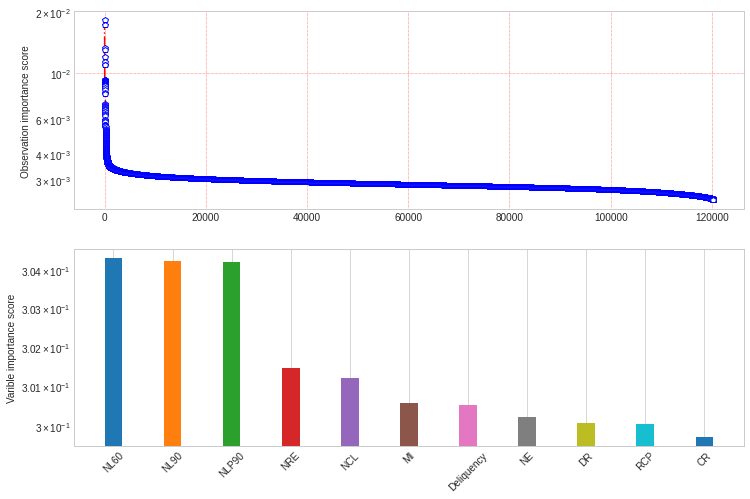

In [0]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)

plt.plot(rank_score,'r-.',marker='p',MarkerEdgeColor='b',MarkerFaceColor='w')
plt.yscale('log')
h=plt.ylabel('Observation importance score')
plt.grid('on',linewidth=0.5,color='r',linestyle=':')

plt.subplot(2,1,2)
plt.style.use('seaborn-whitegrid')
x_tick=np.arange(len(ranked_varibles))

for i in range(len(x_tick)):
    plt.bar(x_tick[i],v_rank_score[i],width=0.3)
    plt.xticks(x_tick,ranked_varibles)
    ax2=plt.gca()
for xtk_label in ax2.get_xticklabels():
    xtk_label.set_rotation(45)
    h=plt.ylabel('Varible importance score')
    plt.yscale('log')

In [0]:
from sklearn.preprocessing import StandardScaler
normalizedData = StandardScaler().fit_transform(credit_risk_clean_data)
normalizedDataSet = pd.DataFrame(data = normalizedData, columns = credit_risk_clean_data.columns, index = credit_risk_clean_data.index)
normalizedDataSet.head(10)

,Deliquency,RCP,CR,NL60,DR,MI,NCL,NLP90,NRE,NL90,NE
person0,3.659427,-0.019973,-0.435985,0.462455,-0.060775,0.170305,0.819965,-0.061157,4.303154,-0.054477,0.999810
person1,-0.273267,-0.019229,-0.782566,-0.109101,-0.062380,-0.282957,-0.919901,-0.061157,-0.917557,-0.054477,0.129023
person2,-0.273267,-0.020393,-0.921199,0.176677,-0.062467,-0.252229,-1.306537,0.227422,-0.917557,-0.054477,-0.741765
person3,-0.273267,-0.022044,-1.475729,-0.109101,-0.062582,-0.234293,-0.726582,-0.061157,-0.917557,-0.054477,-0.741765
person4,-0.273267,-0.019424,-0.158720,0.176677,-0.062609,3.956851,-0.339945,-0.061157,-0.047438,-0.054477,-0.741765
person5,-0.273267,-0.022124,1.574187,-0.109101,-0.061782,-0.220390,-1.113219,-0.061157,-0.047438,-0.054477,0.129023
person6,-0.273267,-0.020018,-0.851883,-0.109101,-0.062173,-0.220390,-0.146627,-0.061157,-0.917557,-0.054477,-0.741765
person7,-0.273267,-0.022217,0.395810,-0.109101,-0.061239,1.182776,0.046691,-0.061157,2.562917,-0.054477,0.999810
person8,-0.273267,-0.020447,-1.475729,-0.109101,-0.061938,-0.289908,-0.726582,-0.061157,-0.917557,-0.054477,-0.741765
person9,-0.273267,-0.022880,-0.020087,-0.109101,-0.061415,-0.011764,-0.339945,-0.061157,0.822680,-0.054477,0.999810


In [0]:
normalizedData2 = normalizedData - np.min(normalizedData)
normalizedDataSet2 = pd.DataFrame(data = normalizedData2, columns = credit_risk_clean_data.columns, index = credit_risk_clean_data.index)
normalizedDataSet2.head(10)

,Deliquency,RCP,CR,NL60,DR,MI,NCL,NLP90,NRE,NL90,NE
person0,7.214645,3.535245,3.119233,4.017673,3.494443,3.725523,4.375183,3.494061,7.858372,3.500741,4.555028
person1,3.281951,3.535989,2.772652,3.446117,3.492838,3.272261,2.635317,3.494061,2.637661,3.500741,3.684241
person2,3.281951,3.534825,2.634019,3.731895,3.492751,3.302989,2.248681,3.782640,2.637661,3.500741,2.813453
person3,3.281951,3.533174,2.079489,3.446117,3.492636,3.320925,2.828636,3.494061,2.637661,3.500741,2.813453
person4,3.281951,3.535794,3.396498,3.731895,3.492609,7.512069,3.215272,3.494061,3.507780,3.500741,2.813453
person5,3.281951,3.533094,5.129405,3.446117,3.493436,3.334828,2.441999,3.494061,3.507780,3.500741,3.684241
person6,3.281951,3.535200,2.703335,3.446117,3.493045,3.334828,3.408591,3.494061,2.637661,3.500741,2.813453
person7,3.281951,3.533001,3.951028,3.446117,3.493979,4.737994,3.601909,3.494061,6.118135,3.500741,4.555028
person8,3.281951,3.534771,2.079489,3.446117,3.493280,3.265310,2.828636,3.494061,2.637661,3.500741,2.813453
person9,3.281951,3.532338,3.535131,3.446117,3.493803,3.543454,3.215272,3.494061,4.377898,3.500741,4.555028


In [0]:
u_0_app_idx, u_idx, rank_score_0,rank_score=n_sva(normalizedDataSet2)

credit_risk_clean_data.iloc[u_idx[0:10], :]

,Deliquency,RCP,CR,NL60,DR,MI,NCL,NLP90,NRE,NL90,NE
person59155,0,0.007328,52,0,0.001470,3008750.0,10,0,1,0,3.0
person68523,0,50708.000000,55,0,0.221757,38000.0,7,0,2,0,0.0
person42970,0,1.000000,89,0,61106.500000,1.0,2,0,0,0,0.0
person102518,0,0.351737,63,0,60212.000000,0.0,8,0,0,1,0.0
person109916,0,0.000000,68,0,0.002776,1794060.0,15,0,1,0,0.0
person117310,0,0.895729,52,2,49112.000000,0.0,16,0,1,0,0.0
person25151,0,29110.000000,58,0,0.402560,10000.0,7,0,1,0,0.0
person89329,0,0.163856,44,0,0.004013,1560100.0,12,0,4,0,2.0
person109571,1,1.000000,33,98,0.000000,2600.0,0,98,0,98,4.0
person83567,1,1.000000,58,98,0.073789,1300.0,0,98,0,98,2.0


In [0]:
credit_risk_clean_data['Deliquency'].value_counts()

0    111912
1      8357
Name: Deliquency, dtype: int64

In [0]:
v_0_app_idx,v_idx,v_rank_score_0,v_rank_score=n_sva(normalizedDataSet2.T)

ranked_varibles=[]

for e in v_idx:
    ranked_varibles.append(normalizedDataSet2.columns[e])
ranked_varible_score={}
for i in range(len(ranked_varibles)):
    ranked_varible_score[ranked_varibles[i]]=v_rank_score[i]
print(str(ranked_varible_score).replace(',',',\n'))

{'NL60': 0.30431434700966464,
 'NL90': 0.30421529475125647,
 'NLP90': 0.3041930097034584,
 'NRE': 0.30148183596325645,
 'NCL': 0.30121517182159874,
 'MI': 0.3005840171293879,
 'Deliquency': 0.3005390528220434,
 'NE': 0.3002111190289971,
 'DR': 0.30006051077915236,
 'RCP': 0.30005020917446185,
 'CR': 0.2997047556706602}


In [0]:
u_0_app_idx, u_idx, rank_score_0,rank_score=n_sva(normalizedDataSet2)

ranked_variblesU=[]

for e in u_idx:
    ranked_variblesU.append(normalizedDataSet2.T.columns[e])
ranked_varible_score={}
for i in range(len(ranked_variblesU)):
    ranked_varible_score[ranked_variblesU[i]]=rank_score[i]
print(str(ranked_varible_score).replace(',',',\n'))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [0]:
print(str(ranked_variblesU).replace(',',',\n'))

In [0]:
new_ranked = pd.Series(ranked_varible_score, name='rank')
print(new_ranked.head(20))

person59155     0.018227
person68523     0.017372
person42970     0.013265
person102518    0.013086
person109916    0.012018
person117310    0.011321
person25151     0.011052
person89329     0.010984
person109571    0.009272
person83567     0.009264
person55593     0.009247
person113750    0.009247
person45833     0.009243
person97736     0.009233
person86857     0.009218
person15653     0.009206
person68219     0.009203
person102064    0.009202
person98085     0.009202
person62730     0.009198
Name: rank, dtype: float64


In [0]:
result = pd.concat([normalizedDataSet2, new_ranked], axis=1, ignore_index=False)
sort_by_rank = result.sort_values('rank', ascending=False)
print(sort_by_rank.head(20))

              Deliquency         RCP        CR  ...       NL90        NE      rank
person59155     3.281951    3.532293  3.604447  ...   3.500741  5.425815  0.018227
person68523     3.281951  200.809248  3.812396  ...   3.500741  2.813453  0.017372
person42970     3.281951    3.536155  6.169150  ...   3.500741  2.813453  0.013265
person102518    3.281951    3.533633  4.366926  ...   3.790774  2.813453  0.013086
person109916    3.281951    3.532265  4.713508  ...   3.500741  2.813453  0.012018
person117310    3.281951    3.535750  3.604447  ...   3.500741  2.813453  0.011321
person25151     3.281951  116.783290  4.020345  ...   3.500741  2.813453  0.011052
person89329     3.281951    3.532902  3.049917  ...   3.500741  4.555028  0.010984
person109571    7.214645    3.536155  2.287437  ...  31.923946  6.296602  0.009272
person83567     7.214645    3.536155  4.020345  ...  31.923946  4.555028  0.009264
person55593     7.214645    3.536155  4.505559  ...  31.923946  3.684241  0.009247
pers

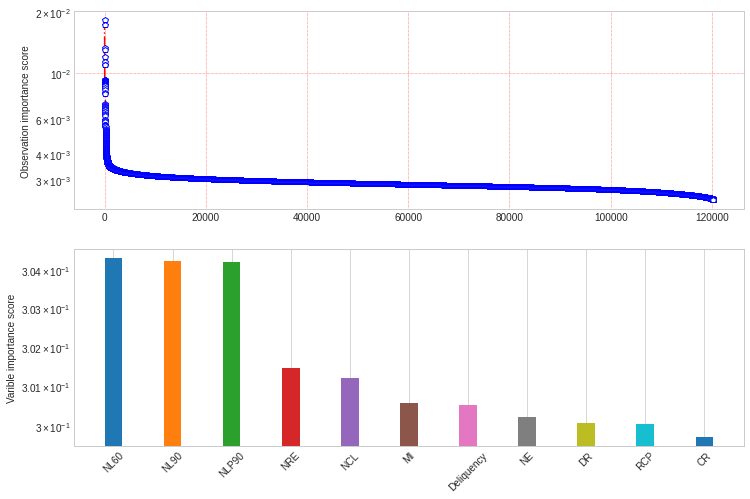

In [0]:
fig=plt.figure(figsize=(12,8))
plt.subplot(2,1,1)

plt.plot(rank_score,'r-.',marker='p',MarkerEdgeColor='b',MarkerFaceColor='w')
plt.yscale('log')
h=plt.ylabel('Observation importance score')
plt.grid('on',linewidth=0.5,color='r',linestyle=':')

plt.subplot(2,1,2)
plt.style.use('seaborn-whitegrid')
x_tick=np.arange(len(ranked_varibles))

for i in range(len(x_tick)):
    plt.bar(x_tick[i],v_rank_score[i],width=0.3)
    plt.xticks(x_tick,ranked_varibles)
    ax2=plt.gca()
for xtk_label in ax2.get_xticklabels():
    xtk_label.set_rotation(45)
    h=plt.ylabel('Varible importance score')
    plt.yscale('log')

In [0]:
credit_risk_clean_data.shape

(120269, 11)

In [0]:
pca_normalizedData = StandardScaler().fit_transform(credit_risk_clean_data)
print(pca_normalizedData)

[[ 3.65942733 -0.01997259 -0.43598504 ...  4.30315443 -0.05447654
   0.9998099 ]
 [-0.2732668  -0.01922942 -0.78256647 ... -0.91755695 -0.05447654
   0.12902268]
 [-0.2732668  -0.02039255 -0.92119905 ... -0.91755695 -0.05447654
  -0.74176455]
 ...
 [-0.2732668  -0.02178702 -0.50530132 ... -0.04743839 -0.05447654
   0.9998099 ]
 [-0.2732668  -0.02295316 -1.47572935 ... -0.91755695 -0.05447654
  -0.74176455]
 [-0.2732668  -0.01964518  0.88102443 ...  0.82268018 -0.05447654
  -0.74176455]]


In [0]:
pca_normalizedData.shape

(120269, 11)

In [0]:
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
data = pd.DataFrame(scale(normalized_data_df), index=normalized_data_df.index, columns= normalized_data_df.columns)
pca_=pd.DataFrame(PCA().fit(data).components_.T, index=data.columns, columns= ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9',
                                                                               'pc10','pc11'])
print('PCs credit data:\n')
pca_

PCs credit data:



,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
Deliquency,0.097940,-0.055991,0.324322,0.117192,-0.117682,-0.756215,0.515747,-0.126875,0.009329,-1.506171e-02,-0.015409
RCP,-0.000678,-0.004774,0.025934,-0.239817,0.949002,-0.197498,-0.038292,-0.014063,-0.022774,-7.094402e-07,0.000022
CR,-0.053644,0.277220,-0.623410,-0.003106,0.000114,-0.084588,0.137463,-0.683602,0.195553,4.104806e-03,0.001208
NL60,0.570219,0.066741,-0.025221,-0.000135,0.004663,0.022187,-0.023665,-0.001527,-0.015503,8.034663e-01,0.151278
DR,-0.002466,0.019175,0.023897,0.837982,0.290584,0.318785,0.332300,0.004564,-0.018281,-9.580589e-05,0.000519
MI,-0.017622,0.288313,0.123915,-0.455396,0.000347,0.427540,0.708034,0.080590,-0.056816,4.309648e-04,0.000227
NCL,-0.067805,0.644574,-0.033841,0.106132,-0.027505,-0.175699,-0.150592,0.085032,-0.711035,-2.002818e-02,0.003086
NLP90,0.572475,0.047694,-0.035172,-0.005509,0.006769,0.036138,-0.023601,-0.004085,0.002439,-5.300055e-01,0.621203
NRE,-0.045696,0.631834,0.172562,0.087348,0.012899,-0.105382,-0.146520,0.277800,0.671839,-2.859905e-03,0.001318
NL90,0.572405,0.056796,-0.041918,-0.005807,0.008870,0.047617,-0.033831,-0.000065,-0.002654,-2.699430e-01,-0.768745


In [0]:
pca_new=pd.DataFrame(PCA().fit_transform(data), index=normalized_data_df.index, columns= ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
                                                                                'PC11'])
print('PCs new credit data:\n')
pca_new

PCs new credit data:



,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
person0,0.325940,3.103391,2.859773,0.756303,-0.426798,-3.038194,0.931385,0.460021,2.221648,0.329447,0.023697
person1,-0.003512,-1.456259,0.329196,-0.127276,0.008462,0.416162,-0.220404,0.129960,-0.101185,-0.019180,-0.013682
person2,0.356269,-1.797018,-0.172271,-0.171365,0.015813,0.328271,0.032104,0.760718,0.158550,0.067880,0.208718
person3,0.018218,-1.604580,0.173337,-0.114332,-0.005082,0.264469,-0.105162,1.192194,-0.359511,-0.022668,-0.012657
person4,-0.029312,0.786928,0.001571,-1.910703,0.000921,1.791134,2.850765,0.903771,-0.034914,0.203925,0.035459
...,...,...,...,...,...,...,...,...,...,...,...
person120264,-0.082492,-0.969029,-0.703099,-0.080184,-0.014744,0.082403,0.032371,0.277932,-0.363748,-0.024719,-0.009786
person120265,-0.170575,-0.357960,-1.581666,-0.029775,0.011193,-0.086622,0.156823,-0.674163,0.963694,-0.008802,-0.008440
person120266,-0.060313,-0.674968,0.919561,-0.156745,0.023204,0.588314,-0.367482,-0.369088,0.508485,-0.023648,-0.013409
person120267,0.028367,-1.680762,0.200666,-0.211189,-0.000595,0.370395,0.042876,1.189304,-0.231576,-0.018724,-0.013215


In [0]:
pca_new['Ranking'] = pca_new.apply(lambda x: np.sqrt(x.dot(x)), axis=1)
print('Top 20 stockes with largest Ranking values')
pca_new.Ranking.sort_values(ascending=False)[0:20]

Top 20 stockes with largest Ranking values


person59155     208.709514
person68523     197.269871
person42970     143.941018
person102518    141.806564
person109916    124.270924
person117310    115.659245
person25151     113.232642
person89329     108.030938
person119599     85.597768
person119700     79.815213
person40525      74.102329
person94057      71.186215
person17555      67.850209
person15474      60.739479
person51169      58.949337
person98255      57.600903
person58222      52.511770
person57519      52.115299
person98858      50.412206
person53642      49.214050
Name: Ranking, dtype: float64

In [0]:
pca_['Ranking'] = pca_.apply(lambda x: np.sqrt(x.dot(x)), axis=1)
print(pca_)

                 pc1       pc2       pc3  ...          pc10      pc11  Ranking
Deliquency  0.097940 -0.055991  0.324322  ... -1.506171e-02 -0.015409      1.0
RCP        -0.000678 -0.004774  0.025934  ... -7.094402e-07  0.000022      1.0
CR         -0.053644  0.277220 -0.623410  ...  4.104806e-03  0.001208      1.0
NL60        0.570219  0.066741 -0.025221  ...  8.034663e-01  0.151278      1.0
DR         -0.002466  0.019175  0.023897  ... -9.580589e-05  0.000519      1.0
MI         -0.017622  0.288313  0.123915  ...  4.309648e-04  0.000227      1.0
NCL        -0.067805  0.644574 -0.033841  ... -2.002818e-02  0.003086      1.0
NLP90       0.572475  0.047694 -0.035172  ... -5.300055e-01  0.621203      1.0
NRE        -0.045696  0.631834  0.172562  ... -2.859905e-03  0.001318      1.0
NL90        0.572405  0.056796 -0.041918  ... -2.699430e-01 -0.768745      1.0
NE          0.001713  0.108879  0.674554  ... -3.683161e-03 -0.001442      1.0

[11 rows x 12 columns]


In [0]:
pca_new.sort_values(by='Ranking', ascending=False)
pca20=pca_new.sort_values(by='Ranking', ascending=False)[0:20]
pca20

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,Ranking
person59155,-3.846336,60.514049,26.992472,-95.124240,0.067583,89.795074,147.149045,15.607724,-12.087039,0.042166,0.037025,208.709514
person68523,-0.356658,-0.021811,4.795232,-48.335071,187.223183,-38.063499,-6.026150,-2.055925,-3.756140,-0.027376,-0.002127,197.269871
person42970,-0.512846,1.849723,1.055437,120.557731,41.848838,45.816636,48.222500,-1.014239,-1.766313,-0.008158,0.065128,143.941018
person102518,-0.323599,2.073814,2.077115,118.919371,41.204516,45.107739,47.090013,0.306786,-2.905663,-0.116877,-0.157525,141.806564
person109916,-2.487749,36.813919,14.042328,-56.534007,-0.004474,52.835443,87.982387,9.830423,-7.707526,0.000588,0.025926,124.270924
person117310,-0.202934,2.929287,2.023121,97.248232,33.575926,36.470459,37.930758,1.080997,-3.099895,0.386554,0.143330,115.659245
person25151,-0.236819,-0.673954,2.095164,-27.374046,107.470671,-22.226547,-4.030601,-1.415039,-2.275895,-0.024813,-0.005339,113.232642
person89329,-2.188864,33.128550,14.708875,-48.979563,0.050801,46.244405,75.532376,9.196753,-4.977410,-0.015514,0.019358,108.030938
person119599,-0.171616,-0.212773,4.102511,-20.503771,81.247931,-16.323626,-4.201013,-1.574360,-1.360826,-0.042775,-0.010347,85.597768
person119700,0.132052,-1.917753,2.972163,-19.572681,75.767005,-14.829891,-3.022502,-1.664652,-1.524664,-0.162988,0.164602,79.815213


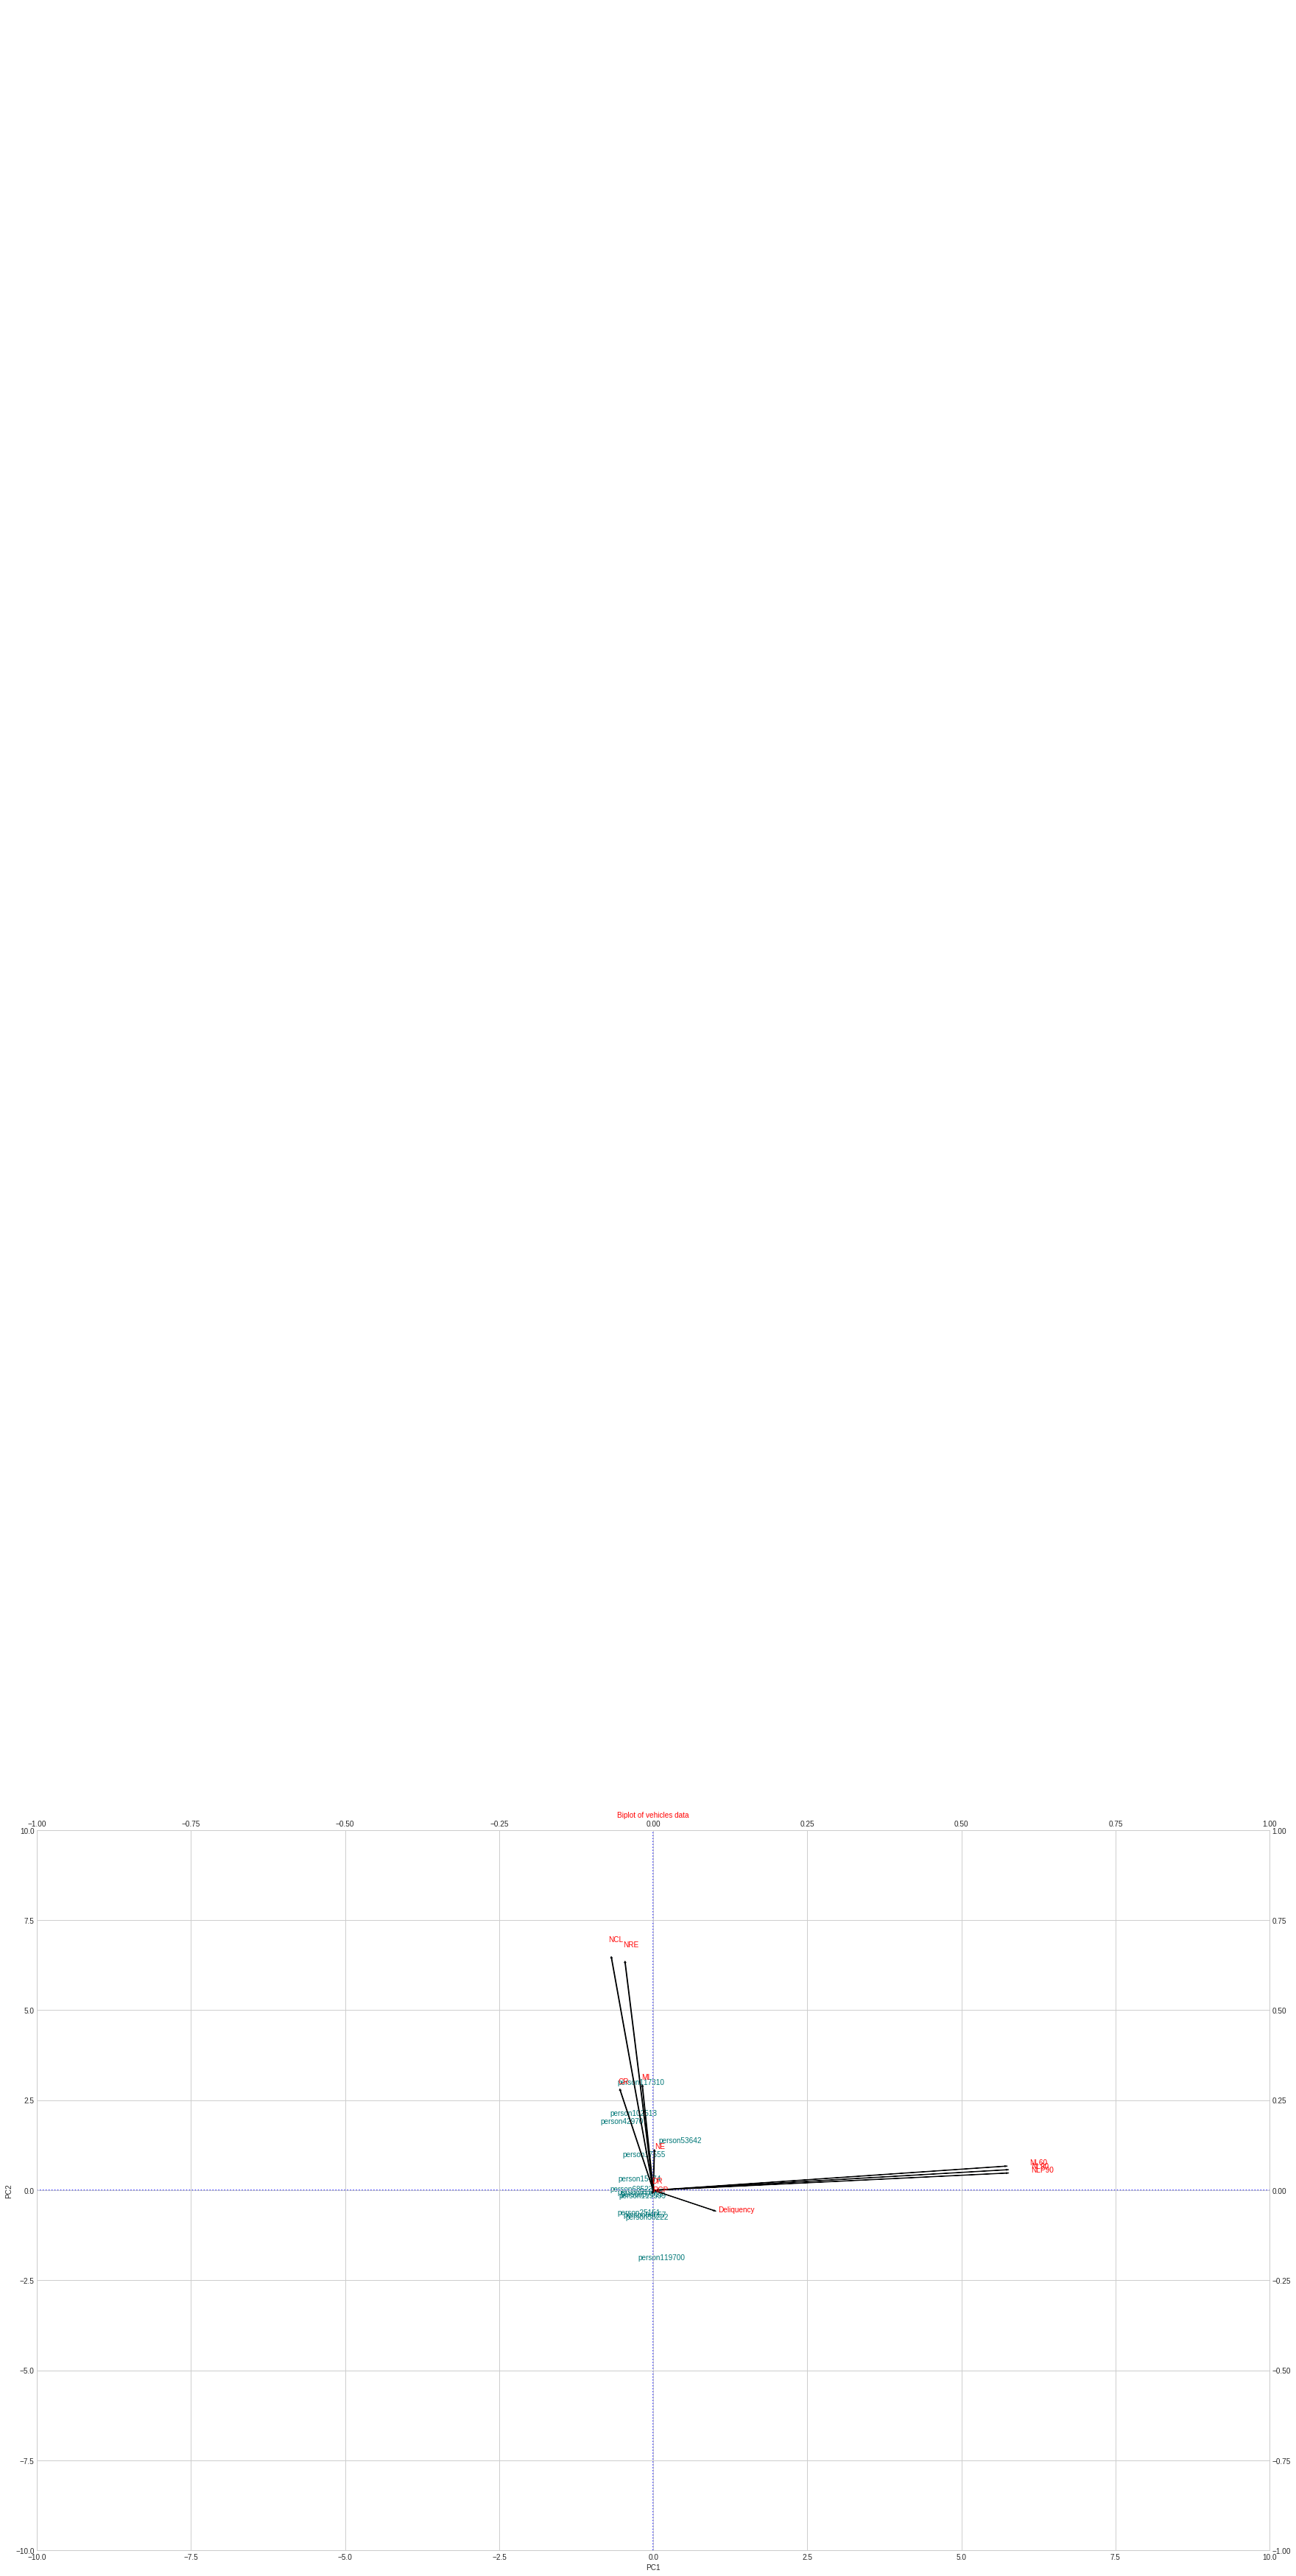

In [0]:
fig , ax1 = plt.subplots(figsize=(30,18))
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
# Plot Principal Components 1 and 2
#pca_new.Ranking.sort_values(ascending=False)[0:20]
for i in pca20.index:
  ax1.annotate(i, (pca20.PC1.loc[i], pca20.PC2.loc[i]), ha='center', color = '#007777')
# Plot reference lines
ax1.hlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.vlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.set_xlabel('PC1', fontsize = 10)
ax1.set_ylabel('PC2', fontsize = 10)
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Biplot of credid data', color='red', fontsize = 10)
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_[['pc1', 'pc2']].index:
  ax2.annotate(i, (pca_.pc1.loc[i]*a, pca_.pc2.loc[i]*a), color='red')
    # Plot vectors
  ax2.arrow(0,0,pca_.pc1[i], pca_.pc2[i])
plt.grid('on')
plt.savefig('Biplot',format='tiff',dpi=600)
plt.show()

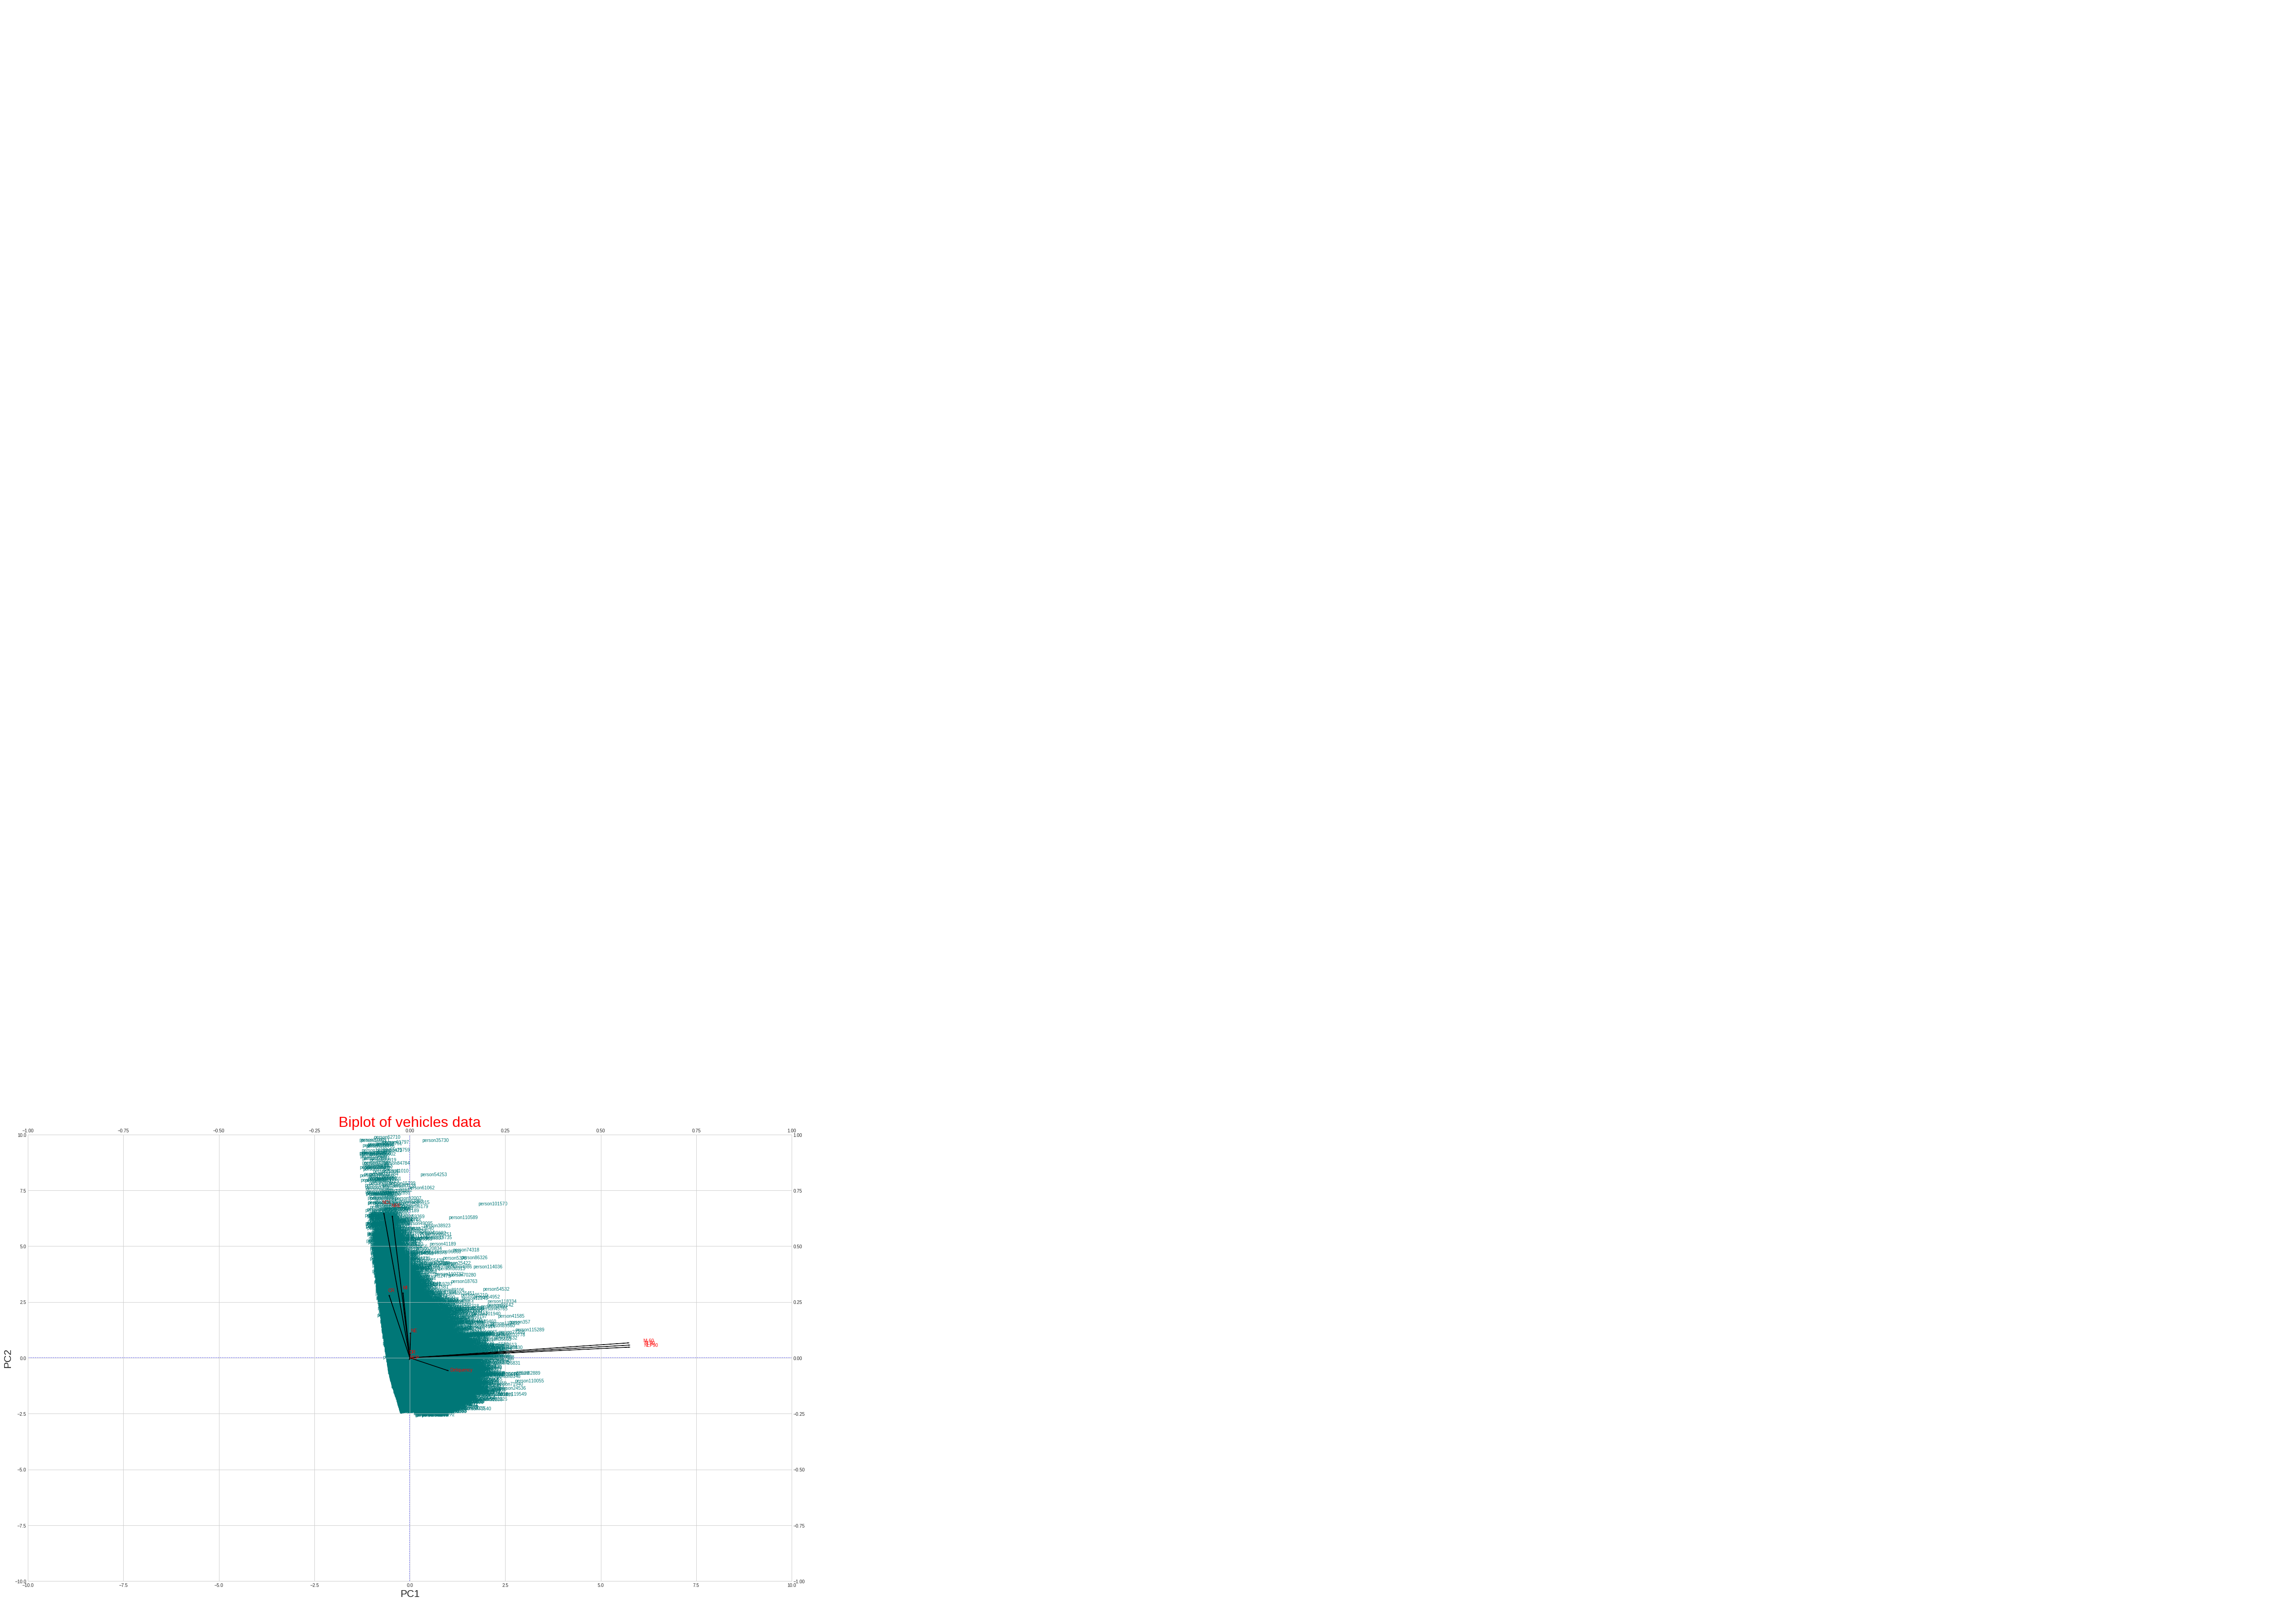

In [0]:
fig , ax1 = plt.subplots(figsize=(30,18))
ax1.set_xlim(-10,10)
ax1.set_ylim(-10,10)
# Plot Principal Components 1 and 2
#pca_new.Ranking.sort_values(ascending=False)[0:20]
for i in pca_new.index:
  ax1.annotate(i, (pca_new.PC1.loc[i], pca_new.PC2.loc[i]), ha='center', color = '#007777')
# Plot reference lines
ax1.hlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.vlines(0,-10,10, linestyles='dotted', colors='blue')
ax1.set_xlabel('PC1', fontsize = 22)
ax1.set_ylabel('PC2', fontsize = 22)
# Plot Principal Component loading vectors, using a second y-axis.
ax2 = ax1.twinx().twiny()
ax2.set_ylim(-1,1)
ax2.set_xlim(-1,1)
ax2.set_xlabel('Biplot of vehicles data', color='red', fontsize = 32)
# Plot labels for vectors. Variable ’a’ is a small offset parameter to separate arrow tip and text.
a = 1.07
for i in pca_[['pc1', 'pc2']].index:
  ax2.annotate(i, (pca_.pc1.loc[i]*a, pca_.pc2.loc[i]*a), color='red')
    # Plot vectors
  ax2.arrow(0,0,pca_.pc1[i], pca_.pc2[i])
plt.grid('on')
plt.savefig('Biplot',format='tiff',dpi=600)
plt.show()

In [0]:
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
pca=PCA(n_components= 2)
pca_new1=pd.DataFrame(pca.fit_transform(data), index=normalized_data_df.index, columns= ['PC1','PC2'])

pca_new1['Ranking'] = pca_new1.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

pca_new1.sort_values(by='Ranking', ascending=False)
pca2=pca_new1.sort_values(by='Ranking', ascending=False)[0:20]
pca2

,PC1,PC2,Ranking
person59155,-3.846336,60.514049,60.636165
person77742,48.915404,2.585208,48.983672
person29541,48.918910,2.491892,48.982336
person42906,48.934099,2.171452,48.982254
person15321,48.933976,2.173456,48.982221
person19556,48.932874,2.191495,48.981923
person63044,48.931348,2.216449,48.981522
person26525,48.931973,2.164612,48.979828
person39441,48.931973,2.164612,48.979828
person55848,48.930993,2.180646,48.979560


<function matplotlib.pyplot.show>

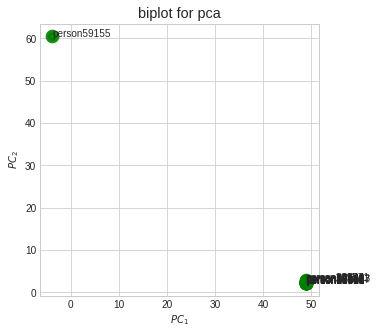

In [0]:
fig, ax=plt.subplots(figsize=(5,5))
plt.style.use('ggplot')
for i in range(len(pca2.index)):
  ax.annotate(pca2.index[i], (pca2.iloc[i,0], pca2.iloc[i,1]))

plt.scatter(pca2['PC1'], pca2['PC2'], marker='o', facecolor='green',linewidth=5, alpha=0.90, s=75)
plt.xlabel('$PC_{1}$')
plt.ylabel('$PC_{2}$')
plt.title('biplot for pca')
plt.show

In [0]:
from sklearn.manifold import TSNE
tsne=TSNE(n_components=2, perplexity=5 )
tsneData= tsne.fit_transform(normalized_data_df)
tsneDF= pd.DataFrame(tsneData, index=data.index, columns=['tsne','tsne'])
tsneDF

,tsne,tsne
person0,-16.554070,-8.720535
person1,-30.092083,-3.500255
person2,-8.194733,7.393112
person3,-2.502192,59.351658
person4,2.819733,3.418165
...,...,...
person120264,-48.312756,-12.685820
person120265,35.597260,29.828787
person120266,19.225401,16.184772
person120267,-51.452538,-14.992273


In [0]:
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA

tsne=TSNE(n_components=2, perplexity=5 )
tsneData= tsne.fit_transform(normalized_data_df)
tsneDF= pd.DataFrame(tsneData, index=data.index, columns=['tsne1','tsne2'])
tsneDF['Ranking'] = tsneDF.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

tsneDF1=tsneDF.sort_values(by='Ranking', ascending=False)[0:20]
tsneDF1

,tsne1,tsne2,Ranking
person106912,-48.812309,-39.504330,62.795174
person11281,-48.812237,-39.504402,62.795162
person88353,-48.812378,-39.504200,62.795143
person69034,-48.812386,-39.504173,62.795132
person30895,-48.812134,-39.504440,62.795105
person408,-48.812408,-39.504101,62.795105
person109152,-48.812481,-39.503567,62.794823
person59552,62.659534,0.567455,62.662106
person36076,62.659439,0.567911,62.662014
person93065,62.659260,0.568757,62.661842


<function matplotlib.pyplot.show>

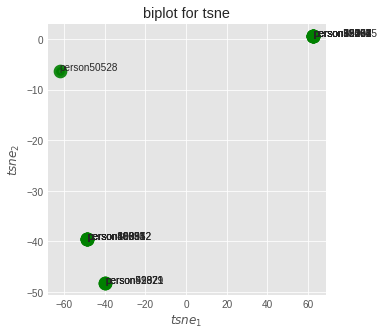

In [0]:
fig, ax=plt.subplots(figsize=(5,5))
plt.style.use('ggplot')
for i in range(len(tsneDF1.index)):
  ax.annotate(tsneDF1.index[i], (tsneDF1.iloc[i,0], tsneDF1.iloc[i,1]))

plt.scatter(tsneDF1['tsne1'], tsneDF1['tsne2'], marker='o', facecolor='green',linewidth=5, alpha=0.90, s=75)
plt.xlabel('$tsne_{1}$')
plt.ylabel('$tsne_{2}$')
plt.title('biplot for tsne')
plt.show


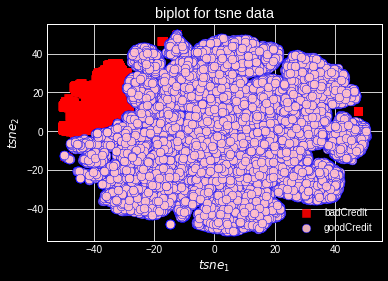

In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

Scaler = StandardScaler()
Scaler.fit(credit_risk_clean_data)

tsne= TSNE(n_components= 2, perplexity= 50)# default is 50 but for small dataset we put 5
normalized_data = Scaler.transform(credit_risk_clean_data)
tsneNewData= tsne.fit_transform(normalized_data)
badCredit=credit_risk_clean_data['Deliquency']==1
goodCredit=credit_risk_clean_data['Deliquency']==0

with plt.style.context('dark_background'):
    plt.scatter(tsneNewData[badCredit,0],tsneNewData[badCredit,1], label='badCredit',color ='r', marker='s',
                edgecolor ='r',s = 75, alpha = 0.9)

    plt.scatter(tsneNewData[goodCredit,0], tsneNewData[goodCredit,1],label='goodCredit',
    marker = 'o',facecolor ='pink', edgecolors='b', linewidth=.5, alpha=0.90, s=75
           )
  
    plt.xlabel('$tsne_{1}$')
    plt.ylabel('$tsne_{2}$')
    plt.title('biplot for tsne data')
    plt.legend()

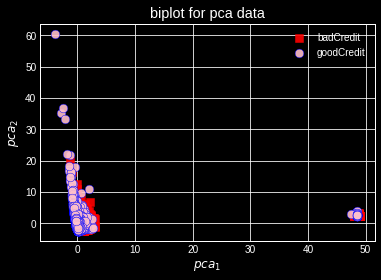

In [0]:
pca=PCA(n_components= 2)
pca_new1=pca.fit_transform(normalized_data)
normalized_data = Scaler.transform(credit_risk_clean_data)
Scaler = StandardScaler()
Scaler.fit(credit_risk_clean_data)



#tsne= TSNE(n_components= 2, perplexity= 50)# default is 50 but for small dataset we put 5
normalized_data = Scaler.transform(credit_risk_clean_data)
#tsneNewData= tsne.fit_transform(normalized_data
badCredit=credit_risk_clean_data['Deliquency']==1
goodCredit=credit_risk_clean_data['Deliquency']==0


with plt.style.context('dark_background'):
    plt.scatter(pca_new1[badCredit,0],pca_new1[badCredit,1], label='badCredit',color ='r', marker='s',
                edgecolor ='r',s = 75, alpha = 0.9)

    plt.scatter(pca_new1[goodCredit,0], pca_new1[goodCredit,1],label='goodCredit',
    marker = 'o',facecolor ='pink', edgecolors='b', linewidth=.5, alpha=0.90, s=75
           )
    

    plt.xlabel('$pca_{1}$')
    plt.ylabel('$pca_{2}$')
    plt.title('biplot for pca data')
    plt.legend()

In [0]:
import umap
embedding = umap.UMAP().fit_transform(normalizedData)

In [0]:
from sklearn.preprocessing import scale 
from sklearn.decomposition import PCA
umap_new1=pd.DataFrame(umap.UMAP().fit_transform(normalizedData), index=credit_risk_clean_data.index, columns= ['Umap1','Umap2'])

umap_new1['Ranking'] = umap_new1.apply(lambda x: np.sqrt(x.dot(x)), axis=1)

umap_new1.sort_values(by='Ranking', ascending=False)
umap2=umap_new1.sort_values(by='Ranking', ascending=False)[0:20]
umap2

,Umap1,Umap2,Ranking
person2106,24.696083,1.428060,24.737339
person72304,24.696051,1.427899,24.737295
person39181,24.696026,1.427553,24.737251
person34125,24.695679,1.427830,24.736919
person59681,24.695663,1.427566,24.736891
person31645,24.695618,1.427598,24.736847
person97665,24.695572,1.427657,24.736805
person69590,24.695272,1.427416,24.736492
person19791,24.695253,1.427247,24.736462
person40277,24.695236,1.427036,24.736433


<function matplotlib.pyplot.show>

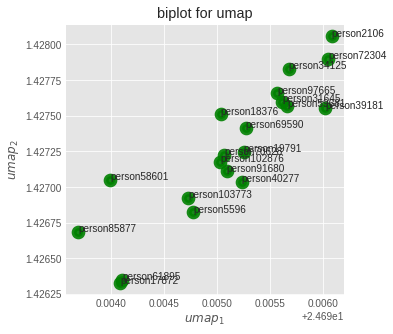

In [0]:
fig, ax=plt.subplots(figsize=(5,5))
plt.style.use('ggplot')
for i in range(len(umap2.index)):
  ax.annotate(umap2.index[i], (umap2.iloc[i,0], umap2.iloc[i,1]))

plt.scatter(umap2['Umap1'], umap2['Umap2'], marker='o', facecolor='green',linewidth=5, alpha=0.90, s=75)
plt.xlabel('$umap_{1}$')
plt.ylabel('$umap_{2}$')
plt.title('biplot for umap')
plt.show

In [0]:
badCredit=credit_risk_clean_data['Deliquency']==1
goodCredit=credit_risk_clean_data['Deliquency']==0

embedding = umap.UMAP(n_neighbors=50,
                      min_dist=0.05,
                      metric='minkowski',init='random').fit_transform(normalizedData)


import matplotlib.pyplot as plt
with plt.style.context('seaborn-deep'):
    plt.figure(figsize=(12,12))
    plt.scatter(embedding[badCredit, 0], embedding[badCredit, 1], 
              c='r', 
              edgecolor='none', 
              alpha=0.80, 
              s=20)
    plt.scatter(embedding[goodCredit, 0], embedding[goodCredit, 1], 
              c='b', 
              edgecolor='none', 
              alpha=0.80,
              s=20)
    plt.axis('off');
    plt.axis('on')

plt.xlabel('$UMAP_{1}$')
plt.ylabel('$UMAP_{2}$')

#to show the labels!
plt.legend(loc=1);
    

Text(0.5, 1.0, 'cars umap')

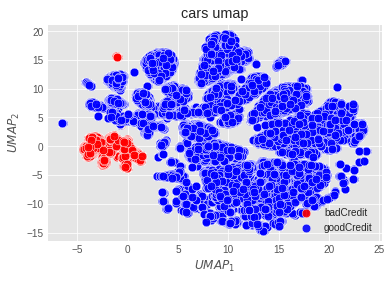

In [0]:
badCredit=credit_risk_clean_data['Deliquency']==1
goodCredit=credit_risk_clean_data['Deliquency']==0

plt.scatter(embedding[badCredit,0],
embedding[badCredit,1],  marker='o', color='red',edgecolors='w',alpha =0.90, s=75, label ='badCredit')

plt.scatter(embedding[goodCredit,0],
embedding[goodCredit,1], marker='o', color='blue', edgecolors='w', alpha =0.90, s=75,label ='goodCredit')




plt.xlabel('$UMAP_{1}$')
plt.ylabel('$UMAP_{2}$')
plt.legend(loc=4)

# Add title
plt.title('credit umap')

In [0]:
import time
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
distance=['euclidean','manhattan','chebyshev','minkowski','jaccard']
neighbor_size= [3,5,7]
X = credit_risk_clean_data[['NL60','NL90']].values
y = credit_risk_clean_data['Delinquency'].astype(int).values
clf = neighbors.KNeighborsClassifier(n_neighbors=10)
clf.fit(x, y)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y) 
k_range = range(1,26)
k=10
scores = {}
scores_list =[]
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k] = metrics.accuracy_score(y_test, y_pred)
  score_list.append(metrics.accuracy_score(y_test, y_pred))

Design a multilayer perceptron(MLP)with at least 2 hiddenlayers(DNN), each of which should have at least 200 neurons to predict your test data ,and calculate at least six classification metrics including diagnostic index
(a) Compare three training methods of MLP: adam, SGD and lbfgs. (b) Turn DNN by gridSearch and check its performance


In [0]:
import time
from sklearn import neighbors
from sklearn.model_selection import train_test_split
distance=['euclidean','manhattan','chebyshev','minkowski','jaccard']
neighbor_size= [3,5,7]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y) 
for d in distance:
  for n in range(len(neighbor_size)):
    kNN = neighbors.KNeighborsClassifier(n_neighbors=neighbor_size[n],weights='distance',metric=d)
    kNN.fit(X_train,y_train)
    predicted_label = kNN.predict(X_test)
    print("\nPredicted test label under distance metric:" + d)
    print(compute_measure(y_test,predicted_label))
    time.sleep(2)



y_test = y_test.values.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, y_test, cmap =cmap_light)

plt.scatter(X_train[:,0], X_train[:, 1], c=y_test, cmap= cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('kNN classification k = ' +'{:d}'.format(nb))
plt.show



Predicted test label under distance metric:euclidean
                 0
accuracy  0.923838
sen       0.244444
spec      0.932853
ppr       0.046080
npr       0.989367

Predicted test label under distance metric:euclidean
                 0
accuracy  0.928661
sen       0.333333
spec      0.932021
ppr       0.026930
npr       0.995979

Predicted test label under distance metric:euclidean
                 0
accuracy  0.929741
sen       0.366197
spec      0.931410
ppr       0.015560
npr       0.997990

Predicted test label under distance metric:manhattan
                 0
accuracy  0.925127
sen       0.257463
spec      0.932649
ppr       0.041293
npr       0.991109

Predicted test label under distance metric:manhattan
                 0
accuracy  0.928494
sen       0.310078
spec      0.931829
ppr       0.023938
npr       0.996024

Predicted test label under distance metric:manhattan
                 0
accuracy  0.929658
sen       0.352113
spec      0.931368
ppr       0.014961
npr       0

NameError: ignored

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions
k=[1,5,20,30,40,80]
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

from sklearn.preprocessing import StandardScaler
#Rescaling features 
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
def knn_comparison(data, k):
    x = data[['MI','NCL']].values
    y = data['Delinquency'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
    plt.xlabel('MI')
    plt.ylabel('NCL')
    plt.title('Knn with K='+ str(k))
    plt.show()

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import warnings 
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
from sklearn import neighbors
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm, datasets
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
Scaler =MinMaxScaler() 


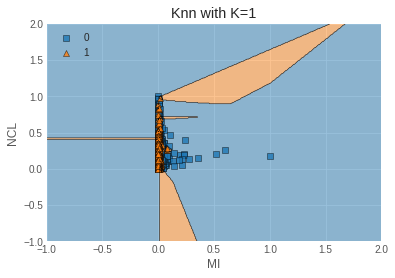

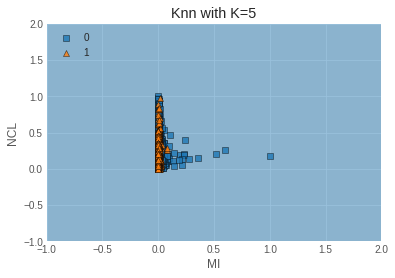

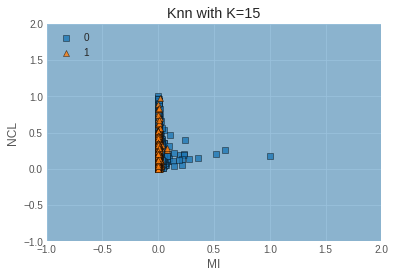

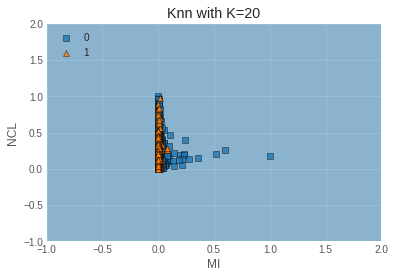

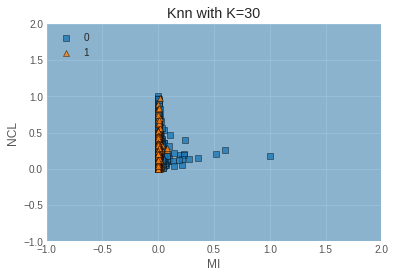

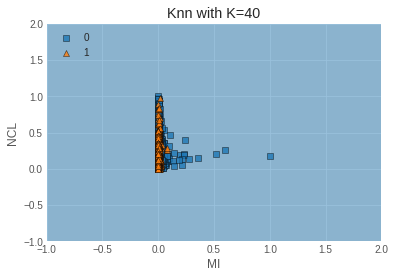

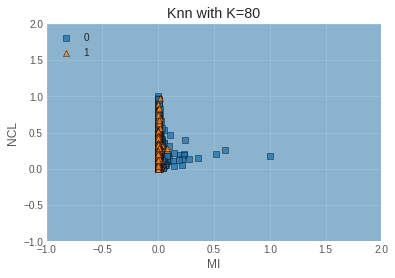

In [0]:
from sklearn.preprocessing import MinMaxScaler 
import pandas as pd
Scaler =MinMaxScaler() 
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
df = credit_risk_clean_data
df.columns=['Delinquency','RCP','CR','NL60','DR','MI','NCL','NLP90','NRE','NL90','NE']
features = [['Delinquency','RCP','CR','NL60','DR','MI','NCL','NLP90','NRE','NL90','NE']]
for feature in features:
    df[feature] = Scaler.fit_transform(df[feature])

X = df.drop(['Delinquency'], axis =1 )
Y = df['Delinquency']
x_scaled = scaler.fit_transform(X)
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df.drop(columns=['Delinquency'])
y = df['Delinquency']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)

for i in [1,5,15,20,30,40,80]:
    knn_comparison(df, i)

In [0]:
k=[1,5,20,30,40,80]
clf = neighbors.KNeighborsClassifier(n_neighbors=k)

from sklearn.preprocessing import StandardScaler
#Rescaling features 
clf = neighbors.KNeighborsClassifier(n_neighbors=k)
def knn_comparison(data, k):
    x = data[['NL60','NL90']].values
    y = data['Delinquency'].astype(int).values
    clf = neighbors.KNeighborsClassifier(n_neighbors=k)
    clf.fit(x, y)
# Plotting decision region
    plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
    plt.xlabel('NL60')
    plt.ylabel('NL90')
    plt.title('Knn with K='+ str(k))
    plt.show()

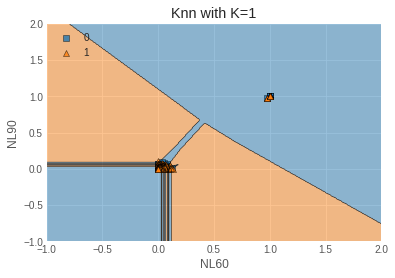

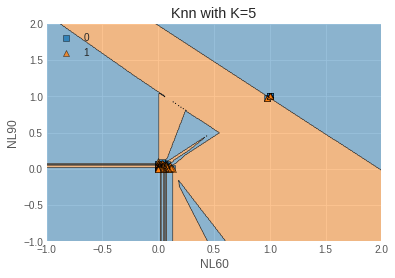

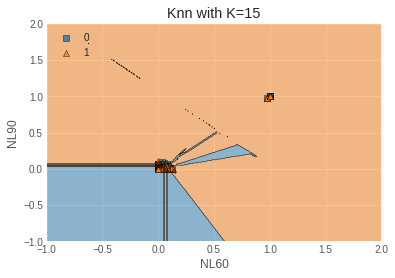

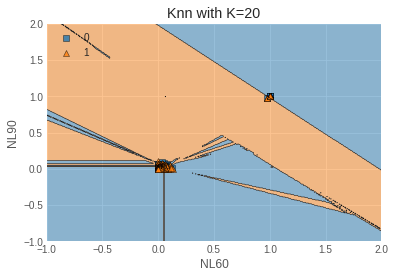

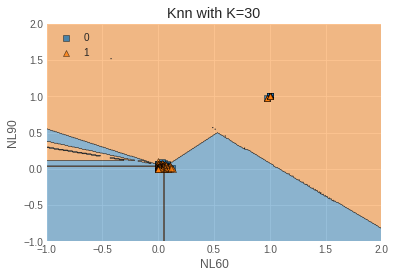

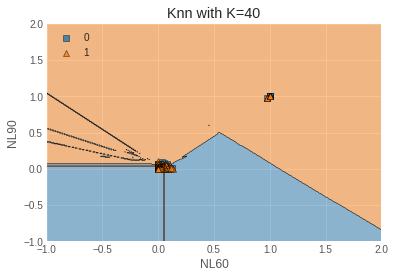

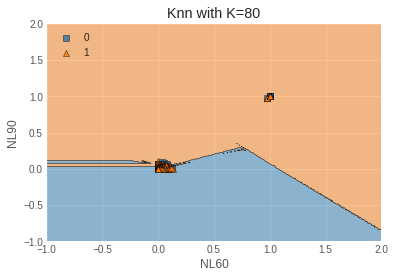

In [0]:
X = df.drop(['Delinquency'], axis =1 )
Y = df['Delinquency']
x_scaled = scaler.fit_transform(X)
#Create KNN Object
knn = KNeighborsClassifier()
#Create x and y variable
x = df.drop(columns=['Delinquency'])
y = df['Delinquency']
#Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)
#Training the model
knn.fit(x_train, y_train)
#Predict testing set
y_pred = knn.predict(x_test)

for i in [1,5,15,20,30,40,80]:
    knn_comparison(df, i)

In [0]:
credit_risk.shape

(150000, 11)

In [0]:
def compute_measure(predicted_label, true_label):
    t_idx = (predicted_label == true_label)
    f_idx = np.logical_not(t_idx)
    p_idx = (true_label > 0)
    n_idx = np.logical_not(p_idx)
    tp = np.sum(np.logical_and(t_idx, p_idx))
    tn = np.sum(np.logical_and(t_idx, n_idx))
    fp = np.sum(n_idx) - tn
    fn = np.sum(p_idx) - tp
    tp_fp_tn_fn_list = []
    tp_fp_tn_fn_list.append(tp)
    tp_fp_tn_fn_list.append(fp)
    tp_fp_tn_fn_list.append(tn)
    tp_fp_tn_fn_list.append(fn)
    tp_fp_tn_fn_list = np.array(tp_fp_tn_fn_list)
    tp = tp_fp_tn_fn_list[0]
    fp = tp_fp_tn_fn_list[1]
    tn = tp_fp_tn_fn_list[2]
    fn = tp_fp_tn_fn_list[3]
    with np.errstate(divide = 'ignore'):
        sen = (1.0*tp)/(tp + fn)
    with np.errstate(divide = 'ignore'):
        spc = (1.0*tn)/(tn + fp)
    with np.errstate(divide = 'ignore'):
        ppr = (1.0*tp)/(tp + fp)
    with np.errstate(divide = 'ignore'):
        npr = (1.0*tn)/(tn + fn)
    acc = (tp + tn)*1.0/(tp+fp+tn+fn)
    ans = []
    ans.append(acc)
    ans.append(sen)
    ans.append(spc)
    ans.append(ppr)
    ans.append(npr)

    return  pd.DataFrame(ans, index = ['accuracy','sen','spec', 'ppr','npr'])

    f1_score = 2(tp)/(2(tp)+fp+fn)
    print(f1_score)

Design a multilayer perceptron(MLP)with at least 2 hiddenlayers(DNN), each of which should have at least 200 neurons to predict your test data ,and calculate at least six classification metrics including diagnostic index
(a) Compare three training methods of MLP: adam, SGD and lbfgs. (b) Turn DNN by gridSearch and check its performance

In [0]:

from sklearn.neural_network import MLPClassifier
import time 

X= credit_risk_clean_data

y=credit_risk_clean_data['Delinquency']
# a MLP with 3 hidden layers each of which has 7 nodes
neuron_no=200
hiddle_layer_no=2
clf= MLPClassifier(alpha=1e-5, hidden_layer_sizes=(neuron_no, hiddle_layer_no), random_state=20)
clf.fit(X,y)
print(clf)
time.sleep(2)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=20, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)


In [0]:
#We can generalize the above to access a neuron Hij in the following way:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
    print()

0 0 [ 3.30121516e-21 -4.29094668e-21  6.64832047e-21 -1.05225185e-19
 -3.60258722e-21  3.31766859e-20 -7.35261291e-20 -8.42708488e-22
  2.23612238e-19  4.40775231e-20 -1.47055653e-19], 
0 1 [ 1.08693181e-01 -3.82540136e-17 -4.40659019e-04  3.98959837e-02
 -8.03325438e-18  8.51929140e-06 -5.44364951e-02 -1.16229125e-01
  4.35018155e-02  7.94596221e-02  5.94940729e-02], 
0 2 [ 2.83606694e-01  2.98415620e-05  7.27952420e-02  2.41112087e-02
  2.88680684e-04  1.06043657e-03  1.02322954e-02 -3.81839799e-02
  4.32854698e-02  6.72517590e-02  1.19139195e-01], 
0 3 [ 2.70133264e-01  5.38872451e-04  1.41558664e-01  2.12961522e-01
  5.92061863e-02  1.10113862e-04  1.65125471e-01  1.97374680e-02
 -1.27504676e-02 -9.59771709e-02  9.78848291e-02], 
0 4 [-2.67615721e-19 -4.80050677e-19  7.00708746e-06 -4.48237086e-14
  1.97121119e-03 -2.62706752e-20 -1.58863840e-05  2.94064059e-20
  1.09740062e-14 -1.01967113e-16 -3.29160285e-19], 
0 5 [ 3.39674227e-02 -9.18605012e-10  2.32307542e-02 -3.31445184e-02
 

In [0]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[ 3.30121516e-21  1.08693181e-01  2.83606694e-01 ...  1.09802781e-21
  -9.63376044e-02  1.11802097e-02]
 [-4.29094668e-21 -3.82540136e-17  2.98415620e-05 ... -1.60727526e-19
  -9.09937591e-04  4.86138859e-03]
 [ 6.64832047e-21 -4.40659019e-04  7.27952420e-02 ... -3.40123175e-19
   4.76336485e-02  5.66388453e-03]
 ...
 [ 2.23612238e-19  4.35018155e-02  4.32854698e-02 ...  3.40395007e-21
   1.81743891e-01 -4.83269291e-03]
 [ 4.40775231e-20  7.94596221e-02  6.72517590e-02 ...  6.37966466e-20
   5.01208938e-02  9.32144431e-02]
 [-1.47055653e-19  5.94940729e-02  1.19139195e-01 ... -1.54078732e-20
   6.95015375e-02  1.95063323e-01]]

weights between first hidden and second hidden layer:
[[ 1.69781590e-19  1.93693197e-21]
 [ 1.55132024e-14  4.29943532e-02]
 [ 1.01826053e+00  1.69201343e-03]
 [ 2.47406261e-01 -3.39836209e-01]
 [-4.47503056e-15 -6.34451369e-05]
 [ 1.52928782e-04  1.28475827e-01]
 [ 4.18700972e-02  2.38899672e-01]
 [ 2.78899849e-02 

intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [0]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])

Bias values for first hidden layer:
[-8.59549632e-02 -1.40554986e-01  2.82599492e-02 -7.26335790e-02
 -4.61095407e-02 -1.17175352e-01  2.04310411e-01  8.19515326e-02
  8.12210602e-02  1.68888416e-01 -1.67295515e-01  1.00093512e-01
  5.45338174e-01 -2.99266125e-02 -5.44103929e-03  2.04540527e-01
 -1.35414759e-01 -4.24035717e-02  2.19054068e-01 -1.13808376e-01
 -8.72306435e-02  2.94632436e-02  1.13284016e-02  2.99185645e-01
  4.91143117e-02  3.59516315e-01  2.60235729e-01 -3.86944936e-02
  1.63061268e-01  7.46473073e-02 -1.67989791e-02 -1.04254838e-01
  6.98289707e-01 -4.08250603e-02 -5.39391305e-02  6.31223883e-02
  3.56243408e-01  1.65483114e-01  2.19033286e-01 -1.21098245e-01
 -5.10107094e-02  7.54191035e-02 -7.74088430e-02 -1.12244615e-01
 -6.62708661e-02  9.30625089e-02  8.41861090e-03 -8.92606667e-02
 -9.65127583e-02 -8.04149043e-02 -2.01317710e-02 -5.29185364e-02
 -9.21230946e-02  1.02731260e-01 -1.40049293e-01  9.18974231e-02
 -6.19351886e-02  8.32645052e-03  1.85032360e+00  8.41

We will populate two clusters (class0 and class1) in a two dimensional space.

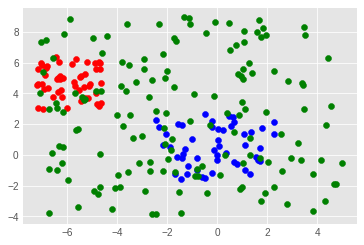

In [0]:
import numpy as np
from matplotlib import pyplot as plt

npoints = 50
X, Y = [], []
# class 0
X.append(np.random.uniform(low=-2.5, high=2.3, size=(npoints,)) )
Y.append(np.random.uniform(low=-1.7, high=2.8, size=(npoints,)))

# class 1
X.append(np.random.uniform(low=-7.2, high=-4.4, size=(npoints,)) )
Y.append(np.random.uniform(low=3, high=6.5, size=(npoints,)))

learnset = []
learnlabels = []
for i in range(2):
    # adding points of class i to learnset
    points = zip(X[i], Y[i])
    for p in points:
        learnset.append(p)
        learnlabels.append(i)

npoints_test = 3 * npoints
TestX = np.random.uniform(low=-7.2, high=5, size=(npoints_test,)) 
TestY = np.random.uniform(low=-4, high=9, size=(npoints_test,))
testset = []
points = zip(TestX, TestY)
for p in points:
    testset.append(p)


colours = ["b", "r"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])
plt.scatter(TestX, TestY, c="g")
plt.show()

In [0]:
mlp = MLPClassifier(hidden_layer_sizes=(200,2 ), 
                    max_iter=480, alpha=1e-4,
                    solver='sgd', verbose=10, 
                    tol=1e-4, random_state=1,
                    learning_rate_init=.1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y) 
y_train = y_train.values.reshape(y_train.shape[0],)
print(X_train.shape, y_train.shape)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_train, y_train))
help(mlp.fit)

(96215, 10) (96215,)
Iteration 1, loss = 0.33572921
Iteration 2, loss = 0.33108047
Iteration 3, loss = 0.33103746
Iteration 4, loss = 0.33103415
Iteration 5, loss = 0.33097624
Iteration 6, loss = 0.33092580
Iteration 7, loss = 0.33088006
Iteration 8, loss = 0.33094030
Iteration 9, loss = 0.33079618
Iteration 10, loss = 0.33074860
Iteration 11, loss = 0.33071518
Iteration 12, loss = 0.33064487
Iteration 13, loss = 0.33063078
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.930510
Test set score: 0.930510
Help on method fit in module sklearn.neural_network._multilayer_perceptron:

fit(X, y) method of sklearn.neural_network._multilayer_perceptron.MLPClassifier instance
    Fit the model to data matrix X and target(s) y.
    
    Parameters
    ----------
    X : ndarray or sparse matrix of shape (n_samples, n_features)
        The input data.
    
    y : ndarray, shape (n_samples,) or (n_samples, n_outputs)
        The target

We will train a MLPClassifier for our two classes:

In [0]:
import matplotlib.pyplot as plt
#from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(20, 3), max_iter=150, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

mlp.fit(learnset, learnlabels)
print("Training set score: %f" % mlp.score(learnset, learnlabels))
print("Test set score: %f" % mlp.score(learnset, learnlabels))


mlp.classes_

Iteration 1, loss = 0.48459015
Iteration 2, loss = 0.45330676
Iteration 3, loss = 0.41910031
Iteration 4, loss = 0.37916768
Iteration 5, loss = 0.34902154
Iteration 6, loss = 0.32071888
Iteration 7, loss = 0.29211360
Iteration 8, loss = 0.26466824
Iteration 9, loss = 0.23903192
Iteration 10, loss = 0.21531835
Iteration 11, loss = 0.19342233
Iteration 12, loss = 0.17340135
Iteration 13, loss = 0.15543359
Iteration 14, loss = 0.13935759
Iteration 15, loss = 0.12509148
Iteration 16, loss = 0.11257767
Iteration 17, loss = 0.10158709
Iteration 18, loss = 0.09192562
Iteration 19, loss = 0.08344560
Iteration 20, loss = 0.07600695
Iteration 21, loss = 0.06947882
Iteration 22, loss = 0.06374207
Iteration 23, loss = 0.05871274
Iteration 24, loss = 0.05428066
Iteration 25, loss = 0.05036398
Iteration 26, loss = 0.04689391
Iteration 27, loss = 0.04381325
Iteration 28, loss = 0.04108894
Iteration 29, loss = 0.03865665
Iteration 30, loss = 0.03647864
Iteration 31, loss = 0.03452232
Iteration 32, los

array([0, 1])

In [0]:
predictions = clf.predict(df)
predictions

array([1., 0., 0., ..., 0., 0., 0.])

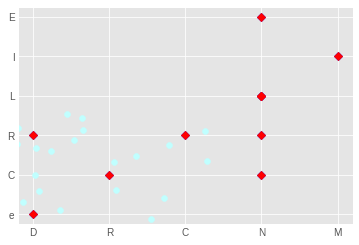

In [0]:
testset = np.array(df)
testset[predictions==1]


colours = ['#C0FFFF', "#FFC8C8"]
for i in range(2):
    plt.scatter(X[i], Y[i], c=colours[i])


colours = ["b", "r"]
for i in range(2):
    cls = df[predictions==i]
    Xt, Yt = zip(*cls)
    plt.scatter(Xt, Yt, marker="D", c=colours[i])

NameError: ignored

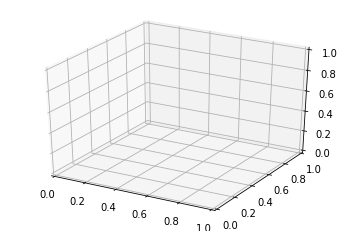

In [0]:
ax = plt.axes(projection='3d')
x= df.values
ax.plot_surface(x, y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

NameError: ignored

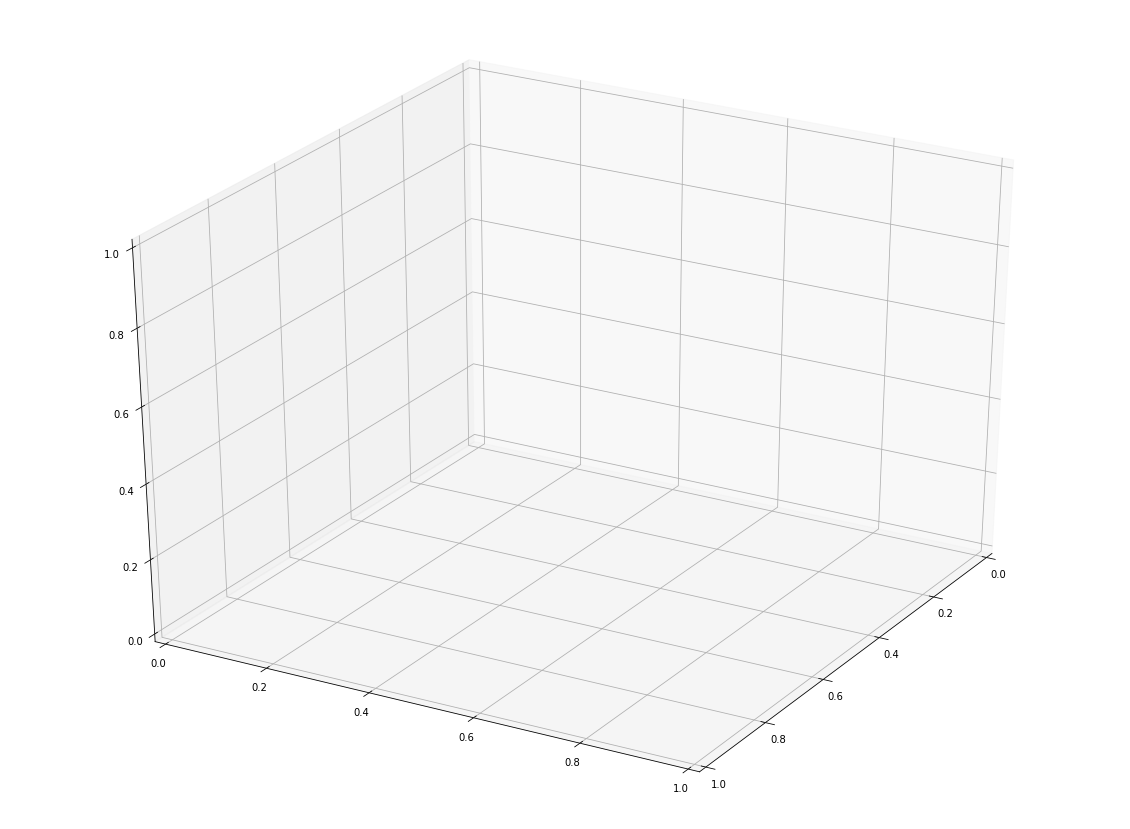

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

fig = plt.figure(figsize=(20, 15))
ax = fig.gca(projection = '3d') 
# Set rotation angle to 30 degrees
ax.view_init(azim=30)
X= credit_risk_clean_data

Y=credit_risk_clean_data['Delinquency']


X, Y = np.meshgrid(X, Y)
#Z = np.exp(-X**2)*np.log(1 + Y**2) + (1 - np.exp(-X**2))*np.log((1 + Y**2) / (Y**2+0.01))

# Plot the surface.
surf = ax.plot_surface(X, Y,  cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_xlabel('X', fontsize = 20)
ax.set_ylabel('Y', fontsize = 20)
#ax.set_zlabel('CE (X, Y)', fontsize = 20)
ax.set_zlim(0, 4.3)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [0]:
credit_risk_clean_data.columns=['Deliquency','RCP','CR','NL60','DR','MI','NCL','NLP90','NRE','NL90','NE']
credit_risk_clean_data.index=["person"+str(i) for i in range(credit_risk_clean_data.shape[0])]
X = credit_risk_clean_data.drop(['Deliquency'], axis =1)
y = credit_risk_clean_data['Deliquency']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y) 

In [0]:
tree_reg_1 = DecisionTreeRegressor(max_depth=2)
tree_reg_1.fit(X, y)
#Use tree_2 to fit data and first error residual (adjust prediction function)
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(X, y)
y2 = y - tree_reg_2.predict(X)
tree_reg_2.fit(X, y2)
y2 = y - tree_reg_2.predict(X)

tree_reg_2.fit(X, y2)
#Use tree_3 to fit data and second error residual (adjust prediction function)
y3= y - tree_reg_2.predict(X)
tree_reg_2 = DecisionTreeRegressor(max_depth=2)
tree_reg_2.fit(X, y3)
tree_reg_3 = DecisionTreeRegressor(max_depth=2)
tree_reg_3.fit(X, y3)
##Add all trees together
y_pred = sum(tree.predict(X) for tree in (tree_reg_1, tree_reg_2, tree_reg_3))
y_pred